## 1. Generar Catalogo GAIA para las Imágenes SPITZER (IRAC-WISE-MIPS)
En esta parte se cargan las imágenes .fits  y sus filtros(diferentes longitudes de onda) correspondientes que se obtienen de:
- IRAC : https://irsa.ipac.caltech.edu/applications/Spitzer/SHA/?__action=layout.showDropDown&
    - 3.6
    - 4.5
    - 5.8
    - 8.0
    
- MIPS : https://irsa.ipac.caltech.edu/applications/Spitzer/SHA/?__action=layout.showDropDown&
    - 24
    - 70
    - 160
- WISE : https://irsa.ipac.caltech.edu/applications/wise/?__action=layout.showDropDown&
    - 3.35
    - 4.6
    - 12
    - 22

Las imágenes se cruzan con el ultimo catalogo vigente de GAIA DR3 para obtener las estrellas en las imágenes, como resultado se obtiene una tabla en formato plano "txt" con el formato:
- ["ra", "dec", "SOURCE_ID"]

Nota: En este caso se utilizaron coordenadas de WISE (la imagen mas pequeña) para garantizar que en todas las fotos se haga el cruce del catalogo con las mismas estrellas.
Ademas se define un radio de búsqueda que se puede variar.

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits
INFO: Query finished. [astroquery.utils.tap.core]
Número de estrellas encontradas: 721
           ra       dec            SOURCE_ID
0  100.240944  9.941616  3326929225657356288
1  100.239724  9.937917  3326929221360458752
2  100.237806  9.945148  3326929221360454912
3  100.245042  9.948208  3326929221360458880
4  100.239768  9.951104  3326929221360456192
DataFrame guardado en D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits_gaia_results.txt


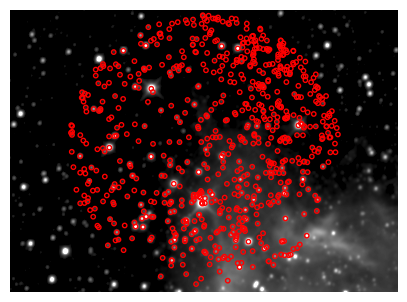

Coordenadas centrales: <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (100.24264732, 9.94081224)>


In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.gaia import Gaia
import os

# Directorio en donde se encuentran las imágenes FITS
wise = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE"

# Búsqueda de los archivos .fits
archivos = glob.glob(wise + r"\*.fits")

# Seleccionar el primer archivo FITS
if archivos:
    fits_file = archivos[0]
    print(f"Procesando archivo: {fits_file}")

    # Cargar el Archivo FITS
    hdul = fits.open(fits_file)
    image_data = hdul[0].data
    header = hdul[0].header
    wcs = WCS(header)

    # Obtener las coordenadas del centro de la imagen
    ny, nx = image_data.shape
    center_x = nx / 2
    center_y = ny / 2
    center_coord = wcs.pixel_to_world(center_x, center_y)

    # Definir radio de búsqueda para la imagen y el catálogo GAIA DR3
    radius_armin = 7  # Radio en minutos de arco

    radius = (radius_armin / 60 * u.deg)  # Radio de búsqueda alrededor del centro de la imagen en grados

    # Realizar la consulta al catálogo GAIA
    Gaia.ROW_LIMIT = 10000
    j = Gaia.cone_search_async(coordinate=center_coord, radius=radius)
    results = j.get_results()

    # Mostrar la cantidad de resultados encontrados
    print(f"Número de estrellas encontradas: {len(results)}")

    # Seleccionar solo tres columnas de la tabla de resultados y convertirlas a un DataFrame de pandas
    columns_1 = results[["ra", "dec", "SOURCE_ID"]]  # Asegúrate de que 'source_id' sea el nombre correcto de la columna
    columns_2 = results[["ra", "dec", "SOURCE_ID","parallax","parallax_error","phot_g_mean_mag"]]
    results_GAIA = columns_1.to_pandas()
    results_GAIA_2 = columns_2.to_pandas()
    print(results_GAIA.head())  # Mostrar las primeras filas del DataFrame

    # Guardar el DataFrame como un archivo de texto plano delimitado por espacios
    output_file = f"{fits_file}_gaia_results.txt"
    output_file_c1 = f"{fits_file}_gaia_results_all.txt"
    results_GAIA.to_csv(output_file, sep=" ", index=False, header=False)
    results_GAIA_2.to_csv(output_file_c1, sep=" ", index=False, header=True)
    
    print(f"DataFrame guardado en {output_file}")

    # Convertir las coordenadas de GAIA a píxeles en la imagen
    gaia_coords = SkyCoord(ra=results["ra"], dec=results["dec"], unit=(u.deg, u.deg))
    x, y = wcs.world_to_pixel(gaia_coords)

    # Mostrar la imagen FITS con los puntos encontrados
    plt.figure(figsize=(5, 5))
    plt.imshow(
        image_data,
        cmap="gist_gray",
        origin="lower",
        norm=PowerNorm(gamma=1 / 2, vmin=10, vmax=255),  # Usar PowerNorm para el escalado logarítmico
    )
    plt.scatter(x, y, s=10, edgecolor="red", facecolor="none", label="GAIA Stars")
    plt.xlabel("X Pixel")
    plt.ylabel("Y Pixel")
    plt.axis('off')
    plt.grid(False)
    plt.show()
    print (f"Coordenadas centrales: {center_coord}")
else:
    print("\n No se encontraron archivos .fits en la carpeta especificada \n")

Cómo se realizo la selección del radio de búsqueda del catalogo, con la imagen de WISE, aquí se muestra la comparación de la region seleccionada para las otras imágenes de  IRAC y MIPS

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits


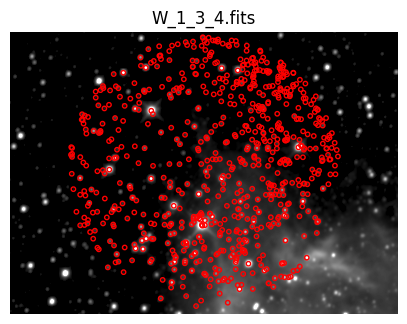

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_2_4_6.fits


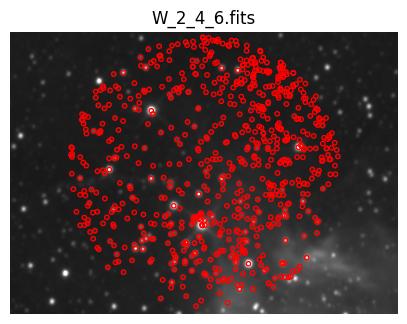

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_3_12.fits


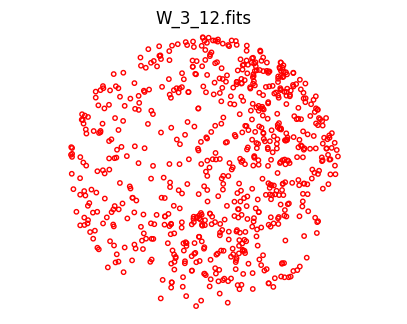

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_4_22.fits


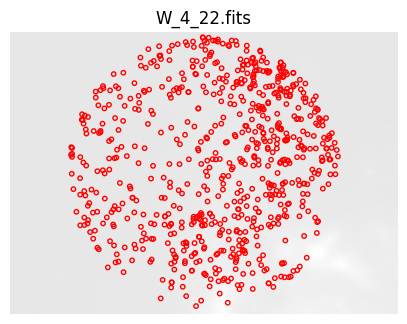

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC\I1_3_6.fits


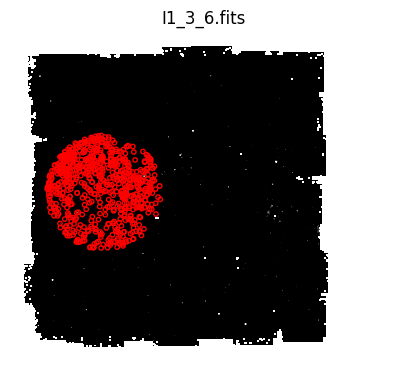

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC\I2_4_5.fits


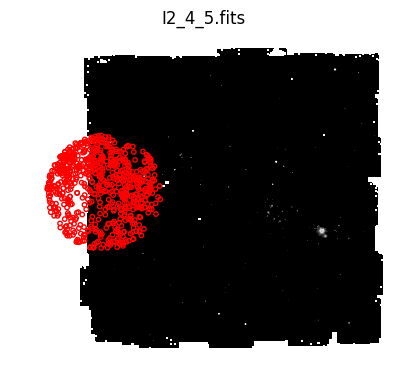

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC\I3_5_8.fits


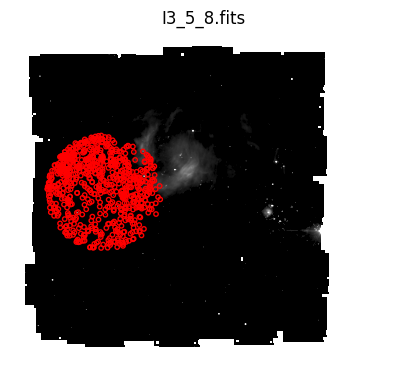

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC\I4_8.fits


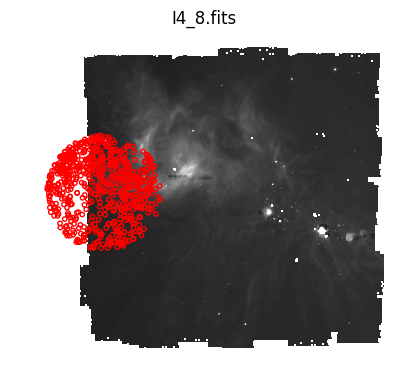

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-MIPS\M1_24.fits


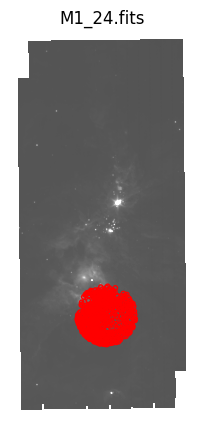

Procesando archivo: D:\GitHub\Tecnicas\NGC2264\NGC2264-MIPS\M2_70.fits


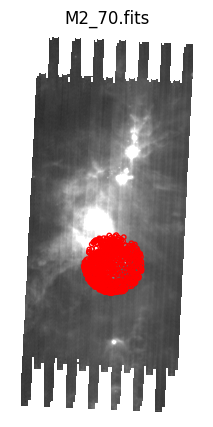

In [3]:
# Directorios en donde se encuentran las imágenes FITS
wise = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE"
irac = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC"
mips = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-MIPS"

# Archivos FITS en las tres carpetas
carpetas = [wise, irac, mips]
archivos_totales = [glob.glob(carpeta + r"\*.fits") for carpeta in carpetas]

# Coordenadas GAIA de las estrellas encontradas previamente
gaia_coords = SkyCoord(ra=results["ra"], dec=results["dec"], unit=(u.deg, u.deg))

# Iterar sobre cada carpeta y cada archivo FITS
for archivos in archivos_totales:
    for fits_file in archivos:
        print(f"Procesando archivo: {fits_file}")

        # Cargar el archivo FITS
        hdul = fits.open(fits_file)
        image_data = hdul[0].data
        header = hdul[0].header
        wcs = WCS(header)

        # Convertir las coordenadas GAIA a píxeles en la nueva imagen
        x, y = wcs.world_to_pixel(gaia_coords)

        # Mostrar la imagen FITS con los puntos encontrados
        plt.figure(figsize=(5, 5))
        plt.imshow(
            image_data,
            cmap="gist_gray",
            origin="lower",
            norm=PowerNorm(
                gamma=1 / 2, vmin=10, vmax=255
            ),  # Usar PowerNorm para el escalado logarítmico
        )
        plt.scatter(x, y, s=10, edgecolor="red", facecolor="none", label="GAIA Stars")
        plt.xlabel("X Pixel")
        plt.ylabel("Y Pixel")
        plt.axis("off")
        plt.grid(False)
        plt.title(f"{os.path.basename(fits_file)}")
        plt.show()

## 2. Generar Catalogo para las Imágenes 2MASS
La obtención del archivo de texto para el catalogo de 2MASS se realiza obteniendo las imágenes de 2 MASS y los filtros:
- https://irsa.ipac.caltech.edu/applications/2MASS/IM/interactive.html
    - J (1.24)
    - H (1.66)
    - K (2.16)

Estas imágenes se cruzan con el catalogo 2MASS, usando la herramienta SAO IMAGE DS9, como resultado se obtiene una tabla en formato plano "txt" con el formato:
- ["ra", "dec", "2MASS"]

Nota: En este caso se utilizaron las mismas coordenadas de WISE.

Sin embargo el catalogo 2MASS maneja un identificador diferente para los objetos encontrados, para GAIA el identificar de conoce como "OBJECT_ ID" mientras que en 2MASS el identificador es "2MASS", por este motivo es necesario realizar un cruce o cross matching entre catálogos. Para esto extrajimos la columna de identificadores de la tabla que se obtuvo en el SAO IMAGE DS9.

In [14]:
import pandas as pd

# Cargar el archivo de texto
file_path = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-2MASS\2MASS_catalog.txt"
data = pd.read_csv(file_path, delim_whitespace=True)

# Extraer la columna "2MASS" y convertirla en una lista
mass_ids = data["2MASS"].tolist()

# Especifica el nombre del archivo de texto donde guardar la lista
output_file = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-2MASS\2mass_ids.txt"

# Guardar la lista como un archivo de texto
with open(output_file, "w") as archivo:
    for id in mass_ids:
        archivo.write("'" + id + "'" + ",\n")


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\1160438980.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True)


Ya en la pagina de búsqueda de GAIA:
- https://gaia.aip.de/query/

Se utilizo la siguiente búsqueda SQL, para los objetos identificados con el catalogo 2MASS:
```sql
SELECT source_id, original_ext_source_id
FROM "gaiaedr3"."tmass_psc_xsc_best_neighbour"
WHERE "original_ext_source_id" IN ('06405987+0949329',
'06410194+0950037',
'06405322+0949437',...)

Una vez se obtuvieron los match entre los dos catálogos, fue necesario generar una nueva tabla para 2MASS que tuviera el identificador de GAIA correspondiente, ademas 2MASS brinda la información de los catálogos directamente, por lo que no es necesario realizar la fotometria.

In [16]:
# Lee el archivo de texto plano y conviértelo en un DataFrame de pandas
input_file = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-2MASS\2MASS_catalog.txt"
data = pd.read_csv(input_file, delim_whitespace=True)

# Seleccionar las columnas relevantes
columns = data[["_RAJ2000", "_DEJ2000", "2MASS"]]
columns_2 = data[["_RAJ2000", "_DEJ2000", "2MASS", "Jmag", "Hmag", "Kmag"]]

# Especifica el nombre del archivo de texto donde guardar la lista
inpt_file = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-2MASS\cross_GAIA.csv"

# Leer el segundo archivo de texto
data_2 = pd.read_csv(inpt_file, delimiter=',')

# Realizar la fusión
results_merge = pd.merge(data_2, columns_2, on="2MASS", how="inner")

# Guardar los DataFrames como archivos de texto plano delimitados por espacios
output_file = f"{input_file}_2MASS_results.txt"
output_file_c1 = f"{input_file}_2MASS_results_all.txt"
output_file_c2 = f"{input_file}_gaia_results.csv"

# Guardar los resultados en archivos
columns.to_csv(output_file, sep=" ", index=False, header=False)
columns_2.to_csv(output_file_c1, sep=" ", index=False, header=True)
results_merge.to_csv(output_file_c2, sep=",", index=False, header=True)

print(f"DataFrame guardado en {output_file}")
print(f"DataFrame guardado en {output_file_c1}")
print(f"DataFrame guardado en {output_file_c2}")

DataFrame guardado en D:\GitHub\Tecnicas\NGC2264\NGC2264-2MASS\2MASS_catalog.txt_2MASS_results.txt
DataFrame guardado en D:\GitHub\Tecnicas\NGC2264\NGC2264-2MASS\2MASS_catalog.txt_2MASS_results_all.txt
DataFrame guardado en D:\GitHub\Tecnicas\NGC2264\NGC2264-2MASS\2MASS_catalog.txt_gaia_results.csv


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\1719733493.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(input_file, delim_whitespace=True)


## 3. Obtener las Magnitudes de los Filtros Utilizando PhotoUN.py
Para el proceso es necesario obtener las magnitudes de los objetos encontrados, para los distintos filtros, para esto se hace uso de la herramienta PhotoUN.py, la cual realiza un proceso de medición de los flujos de las estrellas, obteniendo las cuentas de pixeles para cada objeto. Este proceso tiene en cuenta los valores de "magnitud 0" que es el flujo en un punto de calibración para cada filtro, los valores utilizados son:
- IRAC
    - 3.6 -> zmag = 18.8027
    - 4.5 -> zmag = 18.3177
    - 5.8 -> zmag = 17.8331
    - 8.0 -> zmag = 17.2120
    
- MIPS
    - 24 -> zmag =  11.76
    - 70 -> zmag =  8.29
    - 160 -> zmag =  5.06
- WISE
    - 3.35 -> zmag = 20.5
    - 4.6 -> zmag = 19.5
    - 12 -> zmag = 18.0
    - 22 -> zmag = 13.0

### 3.1 photUN.py para IRAC

In [6]:
###################################################################
# Fotometría de imágenes IRAC/SPITZER                             #
# Andrés Felipe Caro Mejía & Giovanni Pinzon                      #
###################################################################

# Librerias
# **photutlis 1.3.0** ; **astropy 4.3.1**

# INPUT : (1) Directorio en donde se encuentran las imagenes, calibradas
#             astrométricamente lin(27)
#             (https://nova.astrometry.net/upload)
#         (2) Catálogo RA DEC ID "catgaia" lin(51)
#         (3) Ruta Archivos de Salida *csv conteniendo la fotometría lin (354)
#         (4) Carga de catalogo landolt lin(359)
#         (5) Ruta a los archivos *csv lin(375)
#         (6) Parámetros fotométricos lin(254-57)


# OUTPUT : Archivos de texto plano *csv

# INICIO DEL PROGRAMA #
center_box_size = 7

# Se importa la libreria "glob" con el fin de trabajar con una lista con todos los fits
import glob

# Directorio en donde se encuentran las imágenes FITS
carpeta = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC"

# Búsqueda de los archivos .fits
archivos = glob.glob(carpeta + r"\*.fits")

# Impresión de los archivos encontrados y guardado de nombre del archivo en lista
nombres = []
for j in archivos:
    if carpeta in j:
        nombres.append(j.replace(carpeta + "\\", ""))

if nombres:
    l = len(nombres)
    print(f"\n Su carpeta tiene {l} archivos .fits \n")
    print(f"No. 1: {nombres[0]}")
    print(f"          ....            ")
    print(f"No. {l}: {nombres[l-1]}")
else:
    print("\n Su carpeta no tiene archivos .fits \n")

# Carga del catálogo con coordenadas e identificador :  RA DEC ID
# !!!!!!! FORMATO DEBE ESTAR EN: RA - DEC - ID
import numpy as np

archivo_catalogo = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits_gaia_results.txt"

catalogo = open(archivo_catalogo, "r")
objects = catalogo.readlines()
catalogo.close()


# Se organiza el catalogo como una lista ordenada
L_O = []
for i in objects:
    L_O.append(i.split())
listObjects = L_O

# Como el formato del catalogo es hhmmss ggmmss lo pasamos a grados decimales.
ra = [i[0] for i in L_O]
dec = [i[1] for i in L_O]
id = [i[2] for i in L_O]

from astropy.coordinates import SkyCoord
from astropy import units as u

catalogo_decimal = SkyCoord(ra, dec, unit=(u.degree))
catalogo = list(zip(catalogo_decimal.ra.deg, catalogo_decimal.dec.deg, id))
# Fotometría de apertura usando Photutils + Objetos de catálogo
import numpy as np
from photutils.aperture import CircularAperture
from photutils.aperture import CircularAnnulus
from photutils.aperture import aperture_photometry
from photutils.utils import calc_total_error
from scipy.stats import mode
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table


def Photometry_Data_Table(
    fits_name, fits_path, catalogo, r, r_in, r_out, center_box_size, *args
):
    # Se abre el archivo .fits para guardarlo como una variable i.e. image / fits_data
    F = fits.open(fits_path)
    FitsData = F
    w = WCS(FitsData[0].header)
    fits_data = FitsData[0].data
    fits_header = FitsData[0].header
    # print(w.array_shape)
    # print(w.world_axis_physical_types)
    # airmass = fits_header['AIRMASS']
    itime = fits_header["EXPTIME"]
    ifilter = fits_header["CHNLNUM"]
    DateObs = fits_header["DATE_OBS"]
    target = fits_header["OBJECT"]
    epadu = fits_header["GAIN"]
    F.close()

    image = fits_data

    # Funcion que ajusta los objetos del catalogo a solo aquellos que podrían estar en la imágen
    def is_in_pic(w, image, ra, dec):
        ra_max, dec_max = w.array_index_to_world_values(0, 0)
        ra_min, dec_min = w.array_index_to_world_values(image.shape[0], image.shape[1])
        if ra_min > ra_max:
            ra_min = w.array_index_to_world_values(0, 0)[0]
            ra_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[0]
        if dec_min > dec_max:
            dec_min = w.array_index_to_world_values(0, 0)[1]
            dec_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[1]

        return (ra < ra_max) & (ra > ra_min) & (dec < dec_max) & (dec > dec_min)

    NewListO = open(f"Objectlist_{fits_name}.out", "w")
    # Contador de objetos de catálogo que están en la imágen
    object_counter = 0
    for j in range(0, len(catalogo)):
        condicion = is_in_pic(w, image, catalogo[j][0], catalogo[j][1])
        if condicion:
            object_counter += 1
            X, Y = SkyCoord(
                catalogo[j][0], catalogo[j][1], frame="icrs", unit="deg"
            ).to_pixel(w)
            NewListO.write(
                f"{catalogo[j][0]}     {catalogo[j][1]}     {catalogo[j][2]}   {X}   {Y}   {condicion}\n"
            )
    NewListO.close()
    print(
        f"\n Se han encontrado {object_counter} objetos del catalogo en el archivo .fits \n"
    )

    if object_counter == 0:
        return None
        quit()

    # Se guardan las coordenadas de los objetos de catálogo que están en la imágen
    Obj = open(f"Objectlist_{fits_name}.out", "r")
    ListObj = Obj.readlines()
    Obj.close()
    Final_LO = []
    for i in ListObj:
        Final_LO.append(i.split()[:5])
    RA, DEC, ID, x, y = zip(*Final_LO)
    Final_List = np.array(list(zip(RA, DEC, x, y)), dtype=float)
    ID = np.array(ID, dtype="U20")

    # Eliminar los objetos que no esten en el archivo fits (en caso de que la funcion is_in_pic() haya fallado numericamente)
    mm = [
        0 < i[2] and i[2] < (image.shape[0] - 1) for i in Final_List
    ]  # Lista de [Booleanos] (x) en las cuales las posiciones si esten en la imagen
    ID = ID[mm]
    Final_List = Final_List[mm]
    nn = [
        0 < i[3] and i[3] < (image.shape[1] - 1) for i in Final_List
    ]  # Lista de [Booleanos] (y) en las cuales las posiciones si esten en la imagen
    ID = ID[nn]
    Final_List = Final_List[nn]

    # IDs repetidos se categorizan
    u, c = np.unique(ID, return_counts=True)
    dup = u[c > 1]
    for j in dup:
        m = 0
        for i in range(len(ID)):
            if ID[i] == j:
                m += 0.1
                ID[i] = ID[i] + str(m)

    # Se imprime en consola una previsualizacion de como es el nuevo catalogo reducido.
    np.set_printoptions(suppress=True, formatter={"float_kind": "{:f}".format})
    print(f"\nSu catalogo reducido es (filas {len(Final_List)}):\n ")
    print("----RA---- ---DEC--- -----x-----  -----y----- -----ID-------\n")
    print(Final_List[0], ID[0])
    print("    ...       ...         ...          ...         ...        \n")
    print(Final_List[len(Final_List) - 1], ID[len(Final_List) - 1])
    print("---------- --------- ------------  ----------- -------------\n")

    # Se extraen los valores X y Y
    _, _, x_init, y_init = zip(*Final_List)

    from photutils.centroids import centroid_sources, centroid_com

    x, y = centroid_sources(
        image, x_init, y_init, box_size=center_box_size, centroid_func=centroid_com
    )
    X, Y = np.array(x), np.array(y)
    NewIDS = np.array(ID)

    # Se eliminan los datos a los cuales tienen un centroide NaN o inf
    is_nan = ~np.isnan(X)
    x, y = X[is_nan], Y[is_nan]
    Final_List2 = Final_List[is_nan]
    NewIDS = NewIDS[is_nan]

    # Centroides de coordenadas de las estrellas
    starloc = list(zip(x, y))
    # print(starloc)
    if ifilter == 1:
        zmag = 18.8027
    elif ifilter == 2:
        zmag = 18.3177
    elif ifilter == 3:
        zmag = 17.8331
    elif ifilter == 4:
        zmag = 17.2120
    else:
        zmag = 17.2120
    print(zmag)

    # Extracción señal de cada estrella
    aperture = CircularAperture(starloc, r=r)
    annulus_aperture = CircularAnnulus(starloc, r_in=r_in, r_out=r_out)
    apers = [aperture, annulus_aperture]
    # Se genera una tabla de datos.
    phot_table = aperture_photometry(image, apers)

    # Se le asigna nombre de la magnitud dependiendo del filtro en el encabezado
    name_mag = str(ifilter)

    # Area y fujo en los anillos.
    bkg_mean = phot_table["aperture_sum_1"] / annulus_aperture.area
    area_aper = np.array(aperture.area_overlap(image))
    bkg_sum = bkg_mean * area_aper

    # Flujo final para cada objeto
    final_sum = phot_table["aperture_sum_0"] - bkg_sum
    phot_table["flux"] = final_sum
    phot_table["flux"].info.format = "%.8g"

    # Magnitudes Instrumentales
    phot_table[name_mag + "_mag"] = (
        zmag - 2.5 * np.log10(final_sum) + 2.5 * np.log10(itime)
    )
    phot_table[name_mag + "_mag"].info.format = "%.8g"

    # Error de las Magnitudes Instrumentales
    from astropy.stats import sigma_clipped_stats

    mean, median, std = sigma_clipped_stats(image, sigma=3.0)
    stdev = std
    phot_table[name_mag + "_mag_err"] = (
        1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum
    )
    phot_table[name_mag + "_mag_err"].info.format = "%.8g"

    # Se agrega a la tabla la RA, DEC, ID y Masa de aire.
    phot_table["RA"] = [i[0] for i in Final_List2]
    phot_table["DEC"] = [i[1] for i in Final_List2]
    phot_table["ID"] = NewIDS
    # phot_table['AIRMASS'] = airmass
    phot_table["DATE-OBS"] = DateObs
    # phot_table['APERTURE'] = r
    # phot_table['Rint'] = r_in
    # phot_table['Rout'] = r_out
    # phot_table['AIRTEMP'] = ccdtemp
    phot_table["OBJECT"] = fits_header["OBJECT"]
    # Se buscan los indices en donde las magnitudes sean NaN y se eliminan
    index_nan = np.argwhere(np.isnan(phot_table[name_mag + "_mag"].data))
    phot_table.remove_rows(index_nan)
    filas = len(phot_table)
    return phot_table


#########################################
# Definición de parámetros fotométricos #
#########################################
r = 6  # Apertura en px
r_in = 6  # Radio interno anillo cielo
r_out = 17  # Radio externo
#########################################
# Se imprime la tabla en un archivo de texto plano
all_tables = []
for k in range(len(archivos)):
    fits_path = archivos[k]
    fits_name = nombres[k]
    #  catalogo = catalogo_final

    photom = Photometry_Data_Table(
        fits_name,
        fits_path,
        catalogo,
        r=r,
        r_in=r_in,
        r_out=r_out,
        center_box_size=center_box_size,
    )
    if photom is not None:
        all_tables.append(photom)

print(f"Se tienen {len(all_tables)} tablas de las imagenes .fits")
# ----# Crea lista con los nombres de los objetos a los cuales se enfoca el telescopio
focus_object = []
for m in all_tables:

    # if m != []:
    ob = m["OBJECT"][0]

    if ob not in focus_object:

        focus_object.append(
            ob
        )  # Ejemplo: focus_object = ['SA98', 'SA95', '[BSA98', 'SA101', '[ASA98', 'SA104', 'SA92']

# ----#  Se crea diccionario con cada objeto de enfoque
filtro_final = {}
for s in focus_object:
    filtro_final[s] = (
        []
    )  # Ejemplo: filtro_final = {'SA98':[], 'SA95':[], '[BSA98':[], 'SA101':[], '[ASA98':[], 'SA104':[], 'SA92':[]}

# ----#  Se llena el diccionario
for n in all_tables:
    for p in focus_object:
        ob = n["OBJECT"][0]
        if ob == p:
            filtro_final[ob].append(
                n.copy()
            )  # Ejemplo: filtro_final = {'SA98':[tabla1,tabla2,tabla3,..], ... , 'SA92':[tabla1,tabla2,tabla3,..]}

# ----#  Para cada observacion de enfoque se hace la interseccion de los objetos que esten en los tres filtros
for foc in focus_object:
    current_id = []
    for j in filtro_final[foc]:
        current_id.append(j["ID"].data)

    int_d = set(current_id[0]).intersection(
        *current_id
    )  # Ejemplo para SA98: int_d = {'92_248', ... , '92_347'}

    # ----# Se eliminan los objetos que no esten en los tres filtros
    for tab in filtro_final[foc]:
        index_of = []
        for i in range(len(tab["ID"])):
            if tab["ID"][i] not in int_d:
                index_of.append(i)
        tab.remove_rows(index_of)

# ----# Eliminar las tablas que esten vacias
for p in focus_object:
    if len(filtro_final[p][0]) == 0:
        del filtro_final[p]

for foc in filtro_final.keys():
    let = len(filtro_final[foc])


from astropy.table.table import QTable

# noche = input('Ingrese la noche en que hizo la fotometria')
noche = "N3"
""
# ----# Se crean tablas para cada objeto de enfoque
for foc in filtro_final.keys():
    final_obs_table = QTable()
    final_obs_table["OBJECT_ID"] = filtro_final[foc][0]["ID"]
    final_obs_table["RA"] = filtro_final[foc][0]["RA"]
    final_obs_table["DEC"] = filtro_final[foc][0]["DEC"]

    # ----# Se guardan las tablas como archivos .csv
    counter = 0
    for j in filtro_final[foc]:

        final_obs_table[j.colnames[6] + "_" + str(counter // 3)] = j[j.colnames[6]]
        final_obs_table[j.colnames[7] + "_" + str(counter // 3)] = j[j.colnames[7]]
        final_obs_table[
            j.colnames[11] + "_" + j.colnames[6] + "_" + str(counter // 3)
        ] = j[j.colnames[11]]
        counter += 1
    final_obs_table.write(
        f"D:\\GitHub\\Tecnicas\\NGC2264\\NGC2264-IRAC\\Table_IRAC_{foc}.csv", overwrite=True
    )


# FIN DEL PROGRAMA #
# Observatorio Astronómico Nacional 2024 #


 Su carpeta tiene 4 archivos .fits 

No. 1: I1_3_6.fits
          ....            
No. 4: I4_8.fits

 Se han encontrado 721 objetos del catalogo en el archivo .fits 


Su catalogo reducido es (filas 721):
 
----RA---- ---DEC--- -----x-----  -----y----- -----ID-------

[100.240944 9.941616 1151.420688 2102.502652] 3326929225657356288
    ...       ...         ...          ...         ...        

[100.166738 9.851280 1721.633011 2503.779187] 3326717294790476416
---------- --------- ------------  ----------- -------------

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2468846436.py:239: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) + 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2468846436.py:249: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum



 Se han encontrado 721 objetos del catalogo en el archivo .fits 


Su catalogo reducido es (filas 721):
 
----RA---- ---DEC--- -----x-----  -----y----- -----ID-------

[100.240944 9.941616 1151.420688 2102.502652] 3326929225657356288
    ...       ...         ...          ...         ...        

[100.166738 9.851280 1721.633011 2503.779187] 3326717294790476416
---------- --------- ------------  ----------- -------------

18.3177


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2468846436.py:239: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) + 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2468846436.py:249: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum



 Se han encontrado 721 objetos del catalogo en el archivo .fits 


Su catalogo reducido es (filas 721):
 
----RA---- ---DEC--- -----x-----  -----y----- -----ID-------

[100.240944 9.941616 1151.420688 2102.502652] 3326929225657356288
    ...       ...         ...          ...         ...        

[100.166738 9.851280 1721.633011 2503.779187] 3326717294790476416
---------- --------- ------------  ----------- -------------

17.8331


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2468846436.py:239: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) + 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2468846436.py:249: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum



 Se han encontrado 721 objetos del catalogo en el archivo .fits 


Su catalogo reducido es (filas 721):
 
----RA---- ---DEC--- -----x-----  -----y----- -----ID-------

[100.240944 9.941616 1151.420688 2102.502652] 3326929225657356288
    ...       ...         ...          ...         ...        

[100.166738 9.851280 1721.633011 2503.779187] 3326717294790476416
---------- --------- ------------  ----------- -------------

17.212


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2468846436.py:239: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) + 2.5 * np.log10(itime)


Se tienen 4 tablas de las imagenes .fits


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2468846436.py:249: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


### 3.1 photUN.py para MIPS

In [37]:
###################################################################
# Fotometría de imágenes MIPS/SPITZER                             #
# Andrés Felipe Caro Mejía & Giovanni Pinzon                      #
###################################################################

# Librerias
# **photutlis 1.3.0** ; **astropy 4.3.1**

# INPUT : (1) Directorio en donde se encuentran las imagenes, calibradas
#             astrométricamente lin(27)
#             (https://nova.astrometry.net/upload)
#         (2) Catálogo RA DEC ID "catgaia" lin(51)
#         (3) Ruta Archivos de Salida *csv conteniendo la fotometría lin (354)
#         (4) Carga de catalogo landolt lin(359)
#         (5) Ruta a los archivos *csv lin(375)
#         (6) Parámetros fotométricos lin(254-57)


# OUTPUT : Archivos de texto plano *csv

# INICIO DEL PROGRAMA #
center_box_size = 7

# Se importa la libreria "glob" con el fin de trabajar con una lista con todos los fits
import glob

# Directorio en donde se encuentran las imágenes FITS
carpeta = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-MIPS"

# Búsqueda de los archivos .fits
archivos = glob.glob(carpeta + r"\*.fits")

# Impresión de los archivos encontrados y guardado de nombre del archivo en lista
nombres = []
for j in archivos:
    if carpeta in j:
        nombres.append(j.replace(carpeta + "\\", ""))

if nombres:
    l = len(nombres)
    print(f"\n Su carpeta tiene {l} archivos .fits \n")
    print(f"No. 1: {nombres[0]}")
    print(f"          ....            ")
    print(f"No. {l}: {nombres[l-1]}")
else:
    print("\n Su carpeta no tiene archivos .fits \n")

# Carga del catálogo con coordenadas e identificador :  RA DEC ID
# !!!!!!! FORMATO DEBE ESTAR EN: RA - DEC - ID
import numpy as np

archivo_catalogo = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits_gaia_results.txt"

catalogo = open(archivo_catalogo, "r")
objects = catalogo.readlines()
catalogo.close()


# Se organiza el catalogo como una lista ordenada
L_O = []
for i in objects:
    L_O.append(i.split())
listObjects = L_O

# Como el formato del catalogo es hhmmss ggmmss lo pasamos a grados decimales.
ra = [i[0] for i in L_O]
dec = [i[1] for i in L_O]
id = [i[2] for i in L_O]

from astropy.coordinates import SkyCoord
from astropy import units as u

catalogo_decimal = SkyCoord(ra, dec, unit=(u.degree))
catalogo = list(zip(catalogo_decimal.ra.deg, catalogo_decimal.dec.deg, id))
# Fotometría de apertura usando Photutils + Objetos de catálogo
import numpy as np
from photutils.aperture import CircularAperture
from photutils.aperture import CircularAnnulus
from photutils.aperture import aperture_photometry
from photutils.utils import calc_total_error
from scipy.stats import mode
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table


def Photometry_Data_Table(
    fits_name, fits_path, catalogo, r, r_in, r_out, center_box_size, *args
):
    # Se abre el archivo .fits para guardarlo como una variable i.e. image / fits_data
    F = fits.open(fits_path)
    FitsData = F
    w = WCS(FitsData[0].header)
    fits_data = FitsData[0].data
    fits_header = FitsData[0].header
    # print(w.array_shape)
    # print(w.world_axis_physical_types)
    # airmass = fits_header['AIRMASS']
    itime = fits_header["EXPTIME"]
    ifilter = fits_header["CHNLNUM"]
    DateObs = fits_header["DATE_OBS"]
    target = fits_header["OBJECT"]
    # epadu = fits_header['GAIN']
    F.close()

    image = fits_data

    # Funcion que ajusta los objetos del catalogo a solo aquellos que podrían estar en la imágen
    def is_in_pic(w, image, ra, dec):
        ra_max, dec_max = w.array_index_to_world_values(0, 0)
        ra_min, dec_min = w.array_index_to_world_values(image.shape[0], image.shape[1])
        if ra_min > ra_max:
            ra_min = w.array_index_to_world_values(0, 0)[0]
            ra_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[0]
        if dec_min > dec_max:
            dec_min = w.array_index_to_world_values(0, 0)[1]
            dec_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[1]

        return (ra < ra_max) & (ra > ra_min) & (dec < dec_max) & (dec > dec_min)

    NewListO = open(f"Objectlist_{fits_name}.out", "w")
    # Contador de objetos de catálogo que están en la imágen
    object_counter = 0
    for j in range(0, len(catalogo)):
        condicion = is_in_pic(w, image, catalogo[j][0], catalogo[j][1])
        if condicion:
            object_counter += 1
            X, Y = SkyCoord(
                catalogo[j][0], catalogo[j][1], frame="icrs", unit="deg"
            ).to_pixel(w)
            NewListO.write(
                f"{catalogo[j][0]}     {catalogo[j][1]}     {catalogo[j][2]}   {X}   {Y}   {condicion}\n"
            )
    NewListO.close()
    print(
        f"\n Se han encontrado {object_counter} objetos del catalogo en el archivo .fits \n"
    )

    if object_counter == 0:
        return None
        quit()

    # Se guardan las coordenadas de los objetos de catálogo que están en la imágen
    Obj = open(f"Objectlist_{fits_name}.out", "r")
    ListObj = Obj.readlines()
    Obj.close()
    Final_LO = []
    for i in ListObj:
        Final_LO.append(i.split()[:5])
    RA, DEC, ID, x, y = zip(*Final_LO)
    Final_List = np.array(list(zip(RA, DEC, x, y)), dtype=float)
    ID = np.array(ID, dtype="U20")

    # Eliminar los objetos que no esten en el archivo fits (en caso de que la funcion is_in_pic() haya fallado numericamente)
    mm = [
        0 < i[2] and i[2] < (image.shape[0] - 1) for i in Final_List
    ]  # Lista de [Booleanos] (x) en las cuales las posiciones si esten en la imagen
    ID = ID[mm]
    Final_List = Final_List[mm]
    nn = [
        0 < i[3] and i[3] < (image.shape[1] - 1) for i in Final_List
    ]  # Lista de [Booleanos] (y) en las cuales las posiciones si esten en la imagen
    ID = ID[nn]
    Final_List = Final_List[nn]

    # IDs repetidos se categorizan
    u, c = np.unique(ID, return_counts=True)
    dup = u[c > 1]
    for j in dup:
        m = 0
        for i in range(len(ID)):
            if ID[i] == j:
                m += 0.1
                ID[i] = ID[i] + str(m)

    # Se imprime en consola una previsualizacion de como es el nuevo catalogo reducido.
    np.set_printoptions(suppress=True, formatter={"float_kind": "{:f}".format})
    print(f"\nSu catalogo reducido es (filas {len(Final_List)}):\n ")
    print("----RA---- ---DEC--- -----x-----  -----y----- -----ID-------\n")
    print(Final_List[0], ID[0])
    print("    ...       ...         ...          ...         ...        \n")
    print(Final_List[len(Final_List) - 1], ID[len(Final_List) - 1])
    print("---------- --------- ------------  ----------- -------------\n")

    # Se extraen los valores X y Y
    _, _, x_init, y_init = zip(*Final_List)

    from photutils.centroids import centroid_sources, centroid_com

    x, y = centroid_sources(
        image, x_init, y_init, box_size=center_box_size, centroid_func=centroid_com
    )
    X, Y = np.array(x), np.array(y)
    NewIDS = np.array(ID)

    # Se eliminan los datos a los cuales tienen un centroide NaN o inf
    is_nan = ~np.isnan(X)
    x, y = X[is_nan], Y[is_nan]
    Final_List2 = Final_List[is_nan]
    NewIDS = NewIDS[is_nan]

    # Centroides de coordenadas de las estrellas
    starloc = list(zip(x, y))
    # print(starloc)
    if ifilter == 1:  # 24 um
        zmag = 11.76
        epadu = 5.0
    elif ifilter == 2:  # 70 um
        zmag = 8.29
        epadu = 7.0
    elif ifilter == 3:  # 160 um
        zmag = 5.06
        epadu = 7.0
    else:
        zmag = 5.06
        epadu = 7.0
    print(zmag)

    # Extracción señal de cada estrella
    aperture = CircularAperture(starloc, r=r)
    annulus_aperture = CircularAnnulus(starloc, r_in=r_in, r_out=r_out)
    apers = [aperture, annulus_aperture]
    # Se genera una tabla de datos.
    phot_table = aperture_photometry(image, apers)

    # Se le asigna nombre de la magnitud dependiendo del filtro en el encabezado
    name_mag = str(ifilter)

    # Area y fujo en los anillos.
    bkg_mean = phot_table["aperture_sum_1"] / annulus_aperture.area
    area_aper = np.array(aperture.area_overlap(image))
    bkg_sum = bkg_mean * area_aper

    # Flujo final para cada objeto
    final_sum = phot_table["aperture_sum_0"] - bkg_sum
    phot_table["flux"] = final_sum
    phot_table["flux"].info.format = "%.8g"

    # Magnitudes Instrumentales
    phot_table[name_mag + "_mag"] = (
        zmag - 2.5 * np.log10(final_sum) + 2.5 * np.log10(itime)
    )
    phot_table[name_mag + "_mag"].info.format = "%.8g"

    # Error de las Magnitudes Instrumentales
    from astropy.stats import sigma_clipped_stats

    mean, median, std = sigma_clipped_stats(image, sigma=3.0)
    stdev = std
    phot_table[name_mag + "_mag_err"] = (
        1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum
    )
    phot_table[name_mag + "_mag_err"].info.format = "%.8g"

    # Se agrega a la tabla la RA, DEC, ID y Masa de aire.
    phot_table["RA"] = [i[0] for i in Final_List2]
    phot_table["DEC"] = [i[1] for i in Final_List2]
    phot_table["ID"] = NewIDS
    # phot_table['AIRMASS'] = airmass
    phot_table["DATE-OBS"] = DateObs
    # phot_table['APERTURE'] = r
    # phot_table['Rint'] = r_in
    # phot_table['Rout'] = r_out
    # phot_table['AIRTEMP'] = ccdtemp
    phot_table["OBJECT"] = fits_header["OBJECT"]
    # Se buscan los indices en donde las magnitudes sean NaN y se eliminan
    index_nan = np.argwhere(np.isnan(phot_table[name_mag + "_mag"].data))
    phot_table.remove_rows(index_nan)
    filas = len(phot_table)
    return phot_table


#########################################
# Definición de parámetros fotométricos #
#########################################
r = 10  # Apertura en px
r_in = 10  # Radio interno anillo cielo
r_out = 15  # Radio externo

#########################################
# Se imprime la tabla en un archivo de texto plano
all_tables = []
for k in range(len(archivos)):
    fits_path = archivos[k]
    fits_name = nombres[k]
    #  catalogo = catalogo_final

    photom = Photometry_Data_Table(
        fits_name,
        fits_path,
        catalogo,
        r=r,
        r_in=r_in,
        r_out=r_out,
        center_box_size=center_box_size,
    )
    if photom is not None:
        all_tables.append(photom)

print(f"Se tienen {len(all_tables)} tablas de las imagenes .fits")
# ----# Crea lista con los nombres de los objetos a los cuales se enfoca el telescopio
focus_object = []
for m in all_tables:

    # if m != []:
    ob = m["OBJECT"][0]

    if ob not in focus_object:

        focus_object.append(
            ob
        )  # Ejemplo: focus_object = ['SA98', 'SA95', '[BSA98', 'SA101', '[ASA98', 'SA104', 'SA92']

# ----#  Se crea diccionario con cada objeto de enfoque
filtro_final = {}
for s in focus_object:
    filtro_final[s] = (
        []
    )  # Ejemplo: filtro_final = {'SA98':[], 'SA95':[], '[BSA98':[], 'SA101':[], '[ASA98':[], 'SA104':[], 'SA92':[]}

# ----#  Se llena el diccionario
for n in all_tables:
    for p in focus_object:
        ob = n["OBJECT"][0]
        if ob == p:
            filtro_final[ob].append(
                n.copy()
            )  # Ejemplo: filtro_final = {'SA98':[tabla1,tabla2,tabla3,..], ... , 'SA92':[tabla1,tabla2,tabla3,..]}

# ----#  Para cada observacion de enfoque se hace la interseccion de los objetos que esten en los tres filtros
for foc in focus_object:
    current_id = []
    for j in filtro_final[foc]:
        current_id.append(j["ID"].data)

    int_d = set(current_id[0]).intersection(
        *current_id
    )  # Ejemplo para SA98: int_d = {'92_248', ... , '92_347'}

    # ----# Se eliminan los objetos que no esten en los tres filtros
    for tab in filtro_final[foc]:
        index_of = []
        for i in range(len(tab["ID"])):
            if tab["ID"][i] not in int_d:
                index_of.append(i)
        tab.remove_rows(index_of)

# ----# Eliminar las tablas que esten vacias
for p in focus_object:
    if len(filtro_final[p][0]) == 0:
        del filtro_final[p]

for foc in filtro_final.keys():
    let = len(filtro_final[foc])


from astropy.table.table import QTable

# noche = input('Ingrese la noche en que hizo la fotometria')
noche = "N3"
""
# ----# Se crean tablas para cada objeto de enfoque
for foc in filtro_final.keys():
    final_obs_table = QTable()
    final_obs_table["OBJECT_ID"] = filtro_final[foc][0]["ID"]
    final_obs_table["RA"] = filtro_final[foc][0]["RA"]
    final_obs_table["DEC"] = filtro_final[foc][0]["DEC"]

    # ----# Se guardan las tablas como archivos .csv
    counter = 0
    for j in filtro_final[foc]:

        final_obs_table[j.colnames[6] + "_" + str(counter // 3)] = j[j.colnames[6]]
        final_obs_table[j.colnames[7] + "_" + str(counter // 3)] = j[j.colnames[7]]
        final_obs_table[
            j.colnames[11] + "_" + j.colnames[6] + "_" + str(counter // 3)
        ] = j[j.colnames[11]]
        counter += 1
    final_obs_table.write(
        f"D:\\GitHub\\Tecnicas\\NGC2264\\NGC2264-MIPS\\Table_MIPS_{foc}.csv", overwrite=True
    )

# FIN DEL PROGRAMA #
# Observatorio Astronómico Nacional 2024 #


 Su carpeta tiene 2 archivos .fits 

No. 1: M1_24.fits
          ....            
No. 2: M2_70.fits

 Se han encontrado 721 objetos del catalogo en el archivo .fits 


Su catalogo reducido es (filas 721):
 
----RA---- ---DEC--- -----x-----  -----y----- -----ID-------

[100.240944 9.941616 560.650079 594.966609] 3326929225657356288
    ...       ...         ...          ...         ...        

[100.166738 9.851280 452.156568 726.830309] 3326717294790476416
---------- --------- ------------  ----------- -------------

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\818234088.py:241: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) + 2.5 * np.log10(itime)



 Se han encontrado 721 objetos del catalogo en el archivo .fits 


Su catalogo reducido es (filas 721):
 
----RA---- ---DEC--- -----x-----  -----y----- -----ID-------

[100.240944 9.941616 366.513302 546.777870] 3326929225657356288
    ...       ...         ...          ...         ...        

[100.166738 9.851280 305.106498 631.441456] 3326717294790476416
---------- --------- ------------  ----------- -------------

8.29


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\818234088.py:241: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) + 2.5 * np.log10(itime)


Se tienen 2 tablas de las imagenes .fits


### 3.3 photUN.py para WISE

In [8]:
###################################################################
# Fotometría de imágenes WISE/SPITZER                             #
# Andrés Felipe Caro Mejía & Giovanni Pinzon                      #
###################################################################

# Librerias
# **photutlis 1.3.0** ; **astropy 4.3.1**

# INPUT : (1) Directorio en donde se encuentran las imagenes, calibradas
#             astrométricamente lin(27)
#             (https://nova.astrometry.net/upload)
#         (2) Catálogo RA DEC ID "catgaia" lin(51)
#         (3) Ruta Archivos de Salida *csv conteniendo la fotometría lin (354)
#         (4) Carga de catalogo landolt lin(359)
#         (5) Ruta a los archivos *csv lin(375)
#         (6) Parámetros fotométricos lin(254-57)


# OUTPUT : Archivos de texto plano *csv

# INICIO DEL PROGRAMA #
center_box_size = 3

# Se importa la libreria "glob" con el fin de trabajar con una lista con todos los fits
import glob
import math

# Directorio en donde se encuentran las imágenes FITS
carpeta = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE"

# Búsqueda de los archivos .fits
archivos = glob.glob(carpeta + r"\*.fits")

# Impresión de los archivos encontrados y guardado de nombre del archivo en lista
nombres = []
for j in archivos:
    if carpeta in j:
        nombres.append(j.replace(carpeta + "\\", ""))

if nombres:
    l = len(nombres)
    print(f"\n Su carpeta tiene {l} archivos .fits \n")
    print(f"No. 1: {nombres[0]}")
    print(f"          ....            ")
    print(f"No. {l}: {nombres[l-1]}")
else:
    print("\n Su carpeta no tiene archivos .fits \n")

# Carga del catálogo con coordenadas e identificador :  RA DEC ID
# !!!!!!! FORMATO DEBE ESTAR EN: RA - DEC - ID
import numpy as np

archivo_catalogo = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits_gaia_results.txt"

catalogo = open(archivo_catalogo, "r")
objects = catalogo.readlines()
catalogo.close()


# Se organiza el catalogo como una lista ordenada
L_O = []
for i in objects:
    L_O.append(i.split())
listObjects = L_O

# Como el formato del catalogo es hhmmss ggmmss lo pasamos a grados decimales.
ra = [i[0] for i in L_O]
dec = [i[1] for i in L_O]
id = [i[2] for i in L_O]

from astropy.coordinates import SkyCoord
from astropy import units as u

catalogo_decimal = SkyCoord(ra, dec, unit=(u.degree))
catalogo = list(zip(catalogo_decimal.ra.deg, catalogo_decimal.dec.deg, id))
# Fotometría de apertura usando Photutils + Objetos de catálogo
import numpy as np
from photutils.aperture import CircularAperture
from photutils.aperture import CircularAnnulus
from photutils.aperture import aperture_photometry
from photutils.utils import calc_total_error
from scipy.stats import mode
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table


def Photometry_Data_Table(
    fits_name, fits_path, catalogo, r, r_in, r_out, center_box_size, *args
):
    # Se abre el archivo .fits para guardarlo como una variable i.e. image / fits_data
    F = fits.open(fits_path)
    FitsData = F
    w = WCS(FitsData[0].header)
    fits_data = FitsData[0].data
    fits_header = FitsData[0].header
    # print(w.array_shape)
    # print(w.world_axis_physical_types)
    # airmass = fits_header['AIRMASS']
    # itime  = fits_header['EXPTIME']
    ifilter = fits_header["BAND"]
    DateObs = fits_header["MIDOBS"]
    target = fits_header["COADDID"]
    #  epadu = fits_header['GAIN']
    F.close()

    image = fits_data

    # Funcion que ajusta los objetos del catalogo a solo aquellos que podrían estar en la imágen
    def is_in_pic(w, image, ra, dec):
        ra_max, dec_max = w.array_index_to_world_values(0, 0)
        ra_min, dec_min = w.array_index_to_world_values(image.shape[0], image.shape[1])
        if ra_min > ra_max:
            ra_min = w.array_index_to_world_values(0, 0)[0]
            ra_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[0]
        if dec_min > dec_max:
            dec_min = w.array_index_to_world_values(0, 0)[1]
            dec_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[1]

        return (ra < ra_max) & (ra > ra_min) & (dec < dec_max) & (dec > dec_min)

    NewListO = open(f"Objectlist_{fits_name}.out", "w")
    # Contador de objetos de catálogo que están en la imágen
    object_counter = 0
    for j in range(0, len(catalogo)):
        condicion = is_in_pic(w, image, catalogo[j][0], catalogo[j][1])
        if condicion:
            object_counter += 1
            X, Y = SkyCoord(
                catalogo[j][0], catalogo[j][1], frame="icrs", unit="deg"
            ).to_pixel(w)
            NewListO.write(
                f"{catalogo[j][0]}     {catalogo[j][1]}     {catalogo[j][2]}   {X}   {Y}   {condicion}\n"
            )
    NewListO.close()
    print(
        f"\n Se han encontrado {object_counter} objetos del catalogo en el archivo .fits \n"
    )

    if object_counter == 0:
        return None
        quit()

    # Se guardan las coordenadas de los objetos de catálogo que están en la imágen
    Obj = open(f"Objectlist_{fits_name}.out", "r")
    ListObj = Obj.readlines()
    Obj.close()
    Final_LO = []
    for i in ListObj:
        Final_LO.append(i.split()[:5])
    RA, DEC, ID, x, y = zip(*Final_LO)
    Final_List = np.array(list(zip(RA, DEC, x, y)), dtype=float)
    ID = np.array(ID, dtype="U20")

    # Eliminar los objetos que no esten en el archivo fits (en caso de que la funcion is_in_pic() haya fallado numericamente)
    mm = [
        0 < i[2] and i[2] < (image.shape[0] - 1) for i in Final_List
    ]  # Lista de [Booleanos] (x) en las cuales las posiciones si esten en la imagen
    ID = ID[mm]
    Final_List = Final_List[mm]
    nn = [
        0 < i[3] and i[3] < (image.shape[1] - 1) for i in Final_List
    ]  # Lista de [Booleanos] (y) en las cuales las posiciones si esten en la imagen
    ID = ID[nn]
    Final_List = Final_List[nn]

    # IDs repetidos se categorizan
    u, c = np.unique(ID, return_counts=True)
    dup = u[c > 1]
    for j in dup:
        m = 0
        for i in range(len(ID)):
            if ID[i] == j:
                m += 0.1
                ID[i] = ID[i] + str(m)

    # Se imprime en consola una previsualizacion de como es el nuevo catalogo reducido.
    np.set_printoptions(suppress=True, formatter={"float_kind": "{:f}".format})
    print(f"\nSu catalogo reducido es (filas {len(Final_List)}):\n ")
    print("----RA---- ---DEC--- -----x-----  -----y----- -----ID-------\n")
    print(Final_List[0], ID[0])
    print("    ...       ...         ...          ...         ...        \n")
    print(Final_List[len(Final_List) - 1], ID[len(Final_List) - 1])
    print("---------- --------- ------------  ----------- -------------\n")

    # Se extraen los valores X y Y
    _, _, x_init, y_init = zip(*Final_List)

    from photutils.centroids import centroid_sources, centroid_com

    x, y = centroid_sources(
        image, x_init, y_init, box_size=center_box_size, centroid_func=centroid_com
    )
    X, Y = np.array(x), np.array(y)
    NewIDS = np.array(ID)

    # Se eliminan los datos a los cuales tienen un centroide NaN o inf
    is_nan = ~np.isnan(X)
    x, y = X[is_nan], Y[is_nan]
    Final_List2 = Final_List[is_nan]
    NewIDS = NewIDS[is_nan]

    # Centroides de coordenadas de las estrellas
    starloc = list(zip(x, y))
    # print(starloc)
    if ifilter == 1:
        zmag = 20.5
        itime = 7.7
        epadu = 3.20
    elif ifilter == 2:
        zmag = 19.5
        itime = 7.7
        epadu = 3.83
    elif ifilter == 3:
        zmag = 18.0
        itime = 8.8
        epadu = 6.83
    elif ifilter == 4:
        zmag = 13.0
        itime = 8.8
        epadu = 24.50

    else:
        zmag = 8.8
        itime = 7.7
        epadu = 24.50
    # print(zmag)

    # Extracción señal de cada estrella
    aperture = CircularAperture(starloc, r=r)
    annulus_aperture = CircularAnnulus(starloc, r_in=r_in, r_out=r_out)
    apers = [aperture, annulus_aperture]
    # Se genera una tabla de datos.
    phot_table = aperture_photometry(image, apers)

    # Se le asigna nombre de la magnitud dependiendo del filtro en el encabezado
    name_mag = str(ifilter)

    # Area y fujo en los anillos.
    bkg_mean = phot_table["aperture_sum_1"] / annulus_aperture.area
    area_aper = np.array(aperture.area_overlap(image))
    bkg_sum = bkg_mean * area_aper

    # Flujo final para cada objeto
    final_sum = phot_table["aperture_sum_0"] - bkg_sum
    phot_table["flux"] = final_sum
    phot_table["flux"].info.format = "%.8g"
    # print(final_sum)
    # Magnitudes Instrumentales
    phot_table[name_mag + "_mag"] = (
        zmag - 2.5 * np.log10(abs(final_sum)) + 2.5 * np.log10(itime)
    )
    phot_table[name_mag + "_mag"].info.format = "%.8g"

    # Error de las Magnitudes Instrumentales
    from astropy.stats import sigma_clipped_stats

    mean, median, std = sigma_clipped_stats(image, sigma=3.0)
    stdev = std
    phot_table[name_mag + "_mag_err"] = (
        1.0857 * np.sqrt(abs(final_sum) / epadu + area_aper * stdev**2) / final_sum
    )
    phot_table[name_mag + "_mag_err"].info.format = "%.8g"

    # Se agrega a la tabla la RA, DEC, ID y Masa de aire.
    phot_table["RA"] = [i[0] for i in Final_List2]
    phot_table["DEC"] = [i[1] for i in Final_List2]
    phot_table["ID"] = NewIDS
    # phot_table['AIRMASS'] = airmass
    phot_table["DATEOBS"] = DateObs
    # phot_table['APERTURE'] = r
    # phot_table['Rint'] = r_in
    # phot_table['Rout'] = r_out
    # phot_table['AIRTEMP'] = ccdtemp
    phot_table["COADDID"] = fits_header["COADDID"]
    # Se buscan los indices en donde las magnitudes sean NaN y se eliminan
    index_nan = np.argwhere(np.isnan(phot_table[name_mag + "_mag"].data))
    phot_table.remove_rows(index_nan)
    filas = len(phot_table)
    return phot_table


#########################################
# Definición de parámetros fotométricos #
#########################################
r = 8  # Apertura en px
r_in = 8  # Radio interno anillo cielo
r_out = 16  # Radio externo
#########################################
# Se imprime la tabla en un archivo de texto plano
all_tables = []
for k in range(len(archivos)):
    fits_path = archivos[k]
    fits_name = nombres[k]
    #  catalogo = catalogo_final

    photom = Photometry_Data_Table(
        fits_name,
        fits_path,
        catalogo,
        r=r,
        r_in=r_in,
        r_out=r_out,
        center_box_size=center_box_size,
    )
    if photom is not None:
        all_tables.append(photom)

print(f"Se tienen {len(all_tables)} tablas de las imagenes .fits")
# ----# Crea lista con los nombres de los objetos a los cuales se enfoca el telescopio
focus_object = []
for m in all_tables:

    # if m != []:
    ob = m["COADDID"][0]

    if ob not in focus_object:

        focus_object.append(
            ob
        )  # Ejemplo: focus_object = ['SA98', 'SA95', '[BSA98', 'SA101', '[ASA98', 'SA104', 'SA92']

# ----#  Se crea diccionario con cada objeto de enfoque
filtro_final = {}
for s in focus_object:
    filtro_final[s] = (
        []
    )  # Ejemplo: filtro_final = {'SA98':[], 'SA95':[], '[BSA98':[], 'SA101':[], '[ASA98':[], 'SA104':[], 'SA92':[]}

# ----#  Se llena el diccionario
for n in all_tables:
    for p in focus_object:
        ob = n["COADDID"][0]
        if ob == p:
            filtro_final[ob].append(
                n.copy()
            )  # Ejemplo: filtro_final = {'SA98':[tabla1,tabla2,tabla3,..], ... , 'SA92':[tabla1,tabla2,tabla3,..]}

# ----#  Para cada observacion de enfoque se hace la interseccion de los objetos que esten en los tres filtros
for foc in focus_object:
    current_id = []
    for j in filtro_final[foc]:
        current_id.append(j["ID"].data)

    int_d = set(current_id[0]).intersection(
        *current_id
    )  # Ejemplo para SA98: int_d = {'92_248', ... , '92_347'}

    # ----# Se eliminan los objetos que no esten en los tres filtros
    for tab in filtro_final[foc]:
        index_of = []
        for i in range(len(tab["ID"])):
            if tab["ID"][i] not in int_d:
                index_of.append(i)
        tab.remove_rows(index_of)

# ----# Eliminar las tablas que esten vacias
for p in focus_object:
    if len(filtro_final[p][0]) == 0:
        del filtro_final[p]

for foc in filtro_final.keys():
    let = len(filtro_final[foc])


from astropy.table.table import QTable

# noche = input('Ingrese la noche en que hizo la fotometria')
noche = "N3"
""
# ----# Se crean tablas para cada objeto de enfoque
for foc in filtro_final.keys():
    final_obs_table = QTable()
    final_obs_table["OBJECT_ID"] = filtro_final[foc][0]["ID"]
    final_obs_table["RA"] = filtro_final[foc][0]["RA"]
    final_obs_table["DEC"] = filtro_final[foc][0]["DEC"]

    # ----# Se guardan las tablas como archivos .csv
    counter = 0
    for j in filtro_final[foc]:

        final_obs_table[j.colnames[6] + "_" + str(counter // 3)] = j[j.colnames[6]]
        final_obs_table[j.colnames[7] + "_" + str(counter // 3)] = j[j.colnames[7]]
        final_obs_table[
            j.colnames[11] + "_" + j.colnames[6] + "_" + str(counter // 3)
        ] = j[j.colnames[11]]
        counter += 1
    final_obs_table.write(
        f"D:\\GitHub\\Tecnicas\\NGC2264\\NGC2264-WISE\\Table_WISE_{foc}.csv", overwrite=True
    )


# FIN DEL PROGRAMA #
# Observatorio Astronómico Nacional 2023 #


 Su carpeta tiene 4 archivos .fits 

No. 1: W_1_3_4.fits
          ....            
No. 4: W_4_22.fits

 Se han encontrado 721 objetos del catalogo en el archivo .fits 


Su catalogo reducido es (filas 627):
 
----RA---- ---DEC--- -----x-----  -----y----- -----ID-------

[100.240944 9.941616 441.377860 320.586288] 3326929225657356288
    ...       ...         ...          ...         ...        

[100.166738 9.851280 632.624978 83.962117] 3326717294790476416
---------- --------- ------------  ----------- -------------


 Se han encontrado 721 objetos del catalogo en el archivo .fits 


Su catalogo reducido es (filas 627):
 
----RA---- ---DEC--- -----x-----  -----y----- -----ID-------

[100.240944 9.941616 441.377860 320.586288] 3326929225657356288
    ...       ...         ...          ...         ...        

[100.166738 9.851280 632.624978 83.962117] 3326717294790476416
---------- --------- ------------  ----------- -------------


 Se han encontrado 721 objetos del catalogo en el a

## 4. Determinar el Valor Optimo de la apetura (r) e Iterar punto 3
Debido a que existe diferencias entre los tamaños de medición de radios para las estrellas u objetos encontrados en una region, es necesario determinar cual es el valor para el cual la magnitud medida por el algoritmo no presenta grandes variaciones. Esto se hace variando el valor de los diámetros internos y externos para cada estrella y para cada instrumento. A continuación se presenta una gráfica para un objeto con el fin de determinar dicho valor mínimo de apertura (r) para el cual la magnitud no tiene grandes variaciones.

### 4.1 Apertura (r) para IRAC


 Su carpeta tiene 4 archivos .fits 

No. 1: I1_3_6.fits
          ....            
No. 4: I4_8.fits
0

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r1_rIn1.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r1_rIn1.csv: 9.6084547
1

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r2_rIn2.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r2_rIn2.csv: 8.4830034
2

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r3_rIn3.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r3_rIn3.csv: 8.0894788
3

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r4_rIn4.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r4_rIn4.csv: 7.9236392
4

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r5_rIn5.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r5_rIn5.csv: 7.8598927
5

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r6_rIn6.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r6_rIn6.csv: 7.8322542
6

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r7_rIn7.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r7_rIn7.csv: 7.8133725
7

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r8_rIn8.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r8_rIn8.csv: 7.797064
8

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r9_rIn9.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r9_rIn9.csv: 7.7853701
9

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r10_rIn10.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r10_rIn10.csv: 7.7775503
10

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r11_rIn11.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r11_rIn11.csv: 7.770862
11

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r12_rIn12.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r12_rIn12.csv: 7.764069
12

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r13_rIn13.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r13_rIn13.csv: 7.7575922
13

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r14_rIn14.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r14_rIn14.csv: 7.7519498
14

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r15_rIn15.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r15_rIn15.csv: 7.7489034
15

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r16_rIn16.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r16_rIn16.csv: 7.7488131
16

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

18.8027


C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:172: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16632\3914713709.py:179: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_I1_3_6_r17_rIn17.csv
Valores de fila 2, columna 7 en Results_I1_3_6_r17_rIn17.csv: 7.7498897
El índice ii ha superado la longitud de r_in_values
El índice ii ha superado la longitud de r_in_values
El índice ii ha superado la longitud de r_in_values
Fotometría completa.
[9.6084547, 8.4830034, 8.0894788, 7.9236392, 7.8598927, 7.8322542, 7.8133725, 7.797064, 7.7853701, 7.7775503, 7.770862, 7.764069, 7.7575922, 7.7519498, 7.7489034, 7.7488131, 7.7498897]


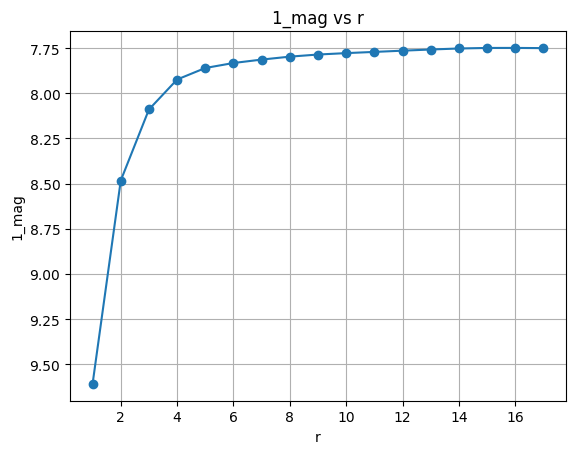

In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
from photutils.centroids import centroid_sources, centroid_com
from astropy.stats import sigma_clipped_stats
import csv
import os

# Directorio en donde se encuentran las imágenes FITS
carpeta = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC"

# Búsqueda de los archivos .fits
archivos = glob.glob(carpeta + r"\*.fits")

# Impresión de los archivos encontrados y guardado de nombre del archivo en lista
nombres = []
for j in archivos:
    if carpeta in j:
        nombres.append(j.replace(carpeta + "\\", ""))

if nombres:
    l = len(nombres)
    print(f"\n Su carpeta tiene {l} archivos .fits \n")
    print(f"No. 1: {nombres[0]}")
    print(f"          ....            ")
    print(f"No. {l}: {nombres[l-1]}")
else:
    print("\n Su carpeta no tiene archivos .fits \n")

# Carga del catálogo con coordenadas e identificador :  RA DEC ID
# !!!!!!! FORMATO DEBE ESTAR EN: RA - DEC - ID
import numpy as np

archivo_catalogo = (r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits_gaia_results.txt")

catalogo = open(archivo_catalogo, "r")
objects = catalogo.readlines()
catalogo.close()
L_O = [i.split() for i in objects]
ra = [i[0] for i in L_O]
dec = [i[1] for i in L_O]
id = [i[2] for i in L_O]

catalogo_decimal = SkyCoord(ra, dec, unit=(u.degree))
catalogo = list(zip(catalogo_decimal.ra.deg, catalogo_decimal.dec.deg, id))

"""_________________________________________________________________________________________________"""
# Definición de parámetros fotométricos
r_values = np.arange(1, 18)  # Lista de valores de apertura en px
r_in_values = np.arange(1, 18)  # Lista de valores de radio interno anillo cielo
r_out = 18  # Radio externo constante
center_box_size = 7
"""__________________________________________________________________________________________________"""


# Función principal de fotometría
def Photometry_Data_Table(
    fits_name, fits_path, catalogo, r, r_in, r_out, center_box_size
):
    F = fits.open(fits_path)
    FitsData = F
    w = WCS(FitsData[0].header)
    fits_data = FitsData[0].data
    fits_header = FitsData[0].header
    itime = fits_header["EXPTIME"]
    ifilter = fits_header["CHNLNUM"]
    DateObs = fits_header["DATE_OBS"]
    target = fits_header["OBJECT"]
    epadu = fits_header['GAIN']
    F.close()

    image = fits_data

    def is_in_pic(w, image, ra, dec):
        ra_max, dec_max = w.array_index_to_world_values(0, 0)
        ra_min, dec_min = w.array_index_to_world_values(image.shape[0], image.shape[1])
        if ra_min > ra_max:
            ra_min = w.array_index_to_world_values(0, 0)[0]
            ra_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[0]
        if dec_min > dec_max:
            dec_min = w.array_index_to_world_values(0, 0)[1]
            dec_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[1]

        return (ra < ra_max) & (ra > ra_min) & (dec < dec_max) & (dec > dec_min)

    NewListO = open(f"Objectlist_{fits_name}.out", "w")
    object_counter = 0
    for j in range(len(catalogo)):
        if is_in_pic(w, image, catalogo[j][0], catalogo[j][1]):
            object_counter += 1
            X, Y = SkyCoord(
                catalogo[j][0], catalogo[j][1], frame="icrs", unit="deg"
            ).to_pixel(w)
            NewListO.write(
                f"{catalogo[j][0]} {catalogo[j][1]} {catalogo[j][2]} {X} {Y}\n"
            )
    NewListO.close()
    print(
        f"\n Se han encontrado {object_counter} objetos del catálogo en el archivo .fits \n"
    )

    if object_counter == 0:
        return None

    with open(f"Objectlist_{fits_name}.out", "r") as Obj:
        ListObj = Obj.readlines()

    Final_LO = [i.split()[:5] for i in ListObj]
    RA, DEC, ID, x, y = zip(*Final_LO)
    Final_List = np.array(list(zip(RA, DEC, x, y)), dtype=float)
    ID = np.array(ID, dtype="U20")

    mm = [0 < i[2] < (image.shape[0] - 1) for i in Final_List]
    ID = ID[mm]
    Final_List = Final_List[mm]
    nn = [0 < i[3] < (image.shape[1] - 1) for i in Final_List]
    ID = ID[nn]
    Final_List = Final_List[nn]

    u, c = np.unique(ID, return_counts=True)
    dup = u[c > 1]
    for j in dup:
        m = 0
        for i in range(len(ID)):
            if ID[i] == j:
                m += 0.1
                ID[i] = ID[i] + str(m)

    _, _, x_init, y_init = zip(*Final_List)

    x, y = centroid_sources(
        image, x_init, y_init, box_size=center_box_size, centroid_func=centroid_com
    )
    X, Y = np.array(x), np.array(y)
    NewIDS = np.array(ID)

    is_nan = ~np.isnan(X)
    x, y = X[is_nan], Y[is_nan]
    Final_List2 = Final_List[is_nan]
    NewIDS = NewIDS[is_nan]

    starloc = list(zip(x, y))

    if ifilter == 1:
        zmag = 18.8027
    elif ifilter == 2:
        zmag = 18.3177
    elif ifilter == 3:
        zmag = 17.8331
    elif ifilter == 4:
        zmag = 17.2120
    else:
        zmag = 17.2120
    print(zmag)

    aperture = CircularAperture(starloc, r=r)
    annulus_aperture = CircularAnnulus(starloc, r_in=r_in, r_out=r_out)
    apers = [aperture, annulus_aperture]
    phot_table = aperture_photometry(image, apers)

    name_mag = str(ifilter)
    bkg_mean = phot_table["aperture_sum_1"] / annulus_aperture.area
    area_aper = np.array(aperture.area_overlap(image))
    bkg_sum = bkg_mean * area_aper
    final_sum = phot_table["aperture_sum_0"] - bkg_sum
    phot_table["flux"] = final_sum
    phot_table["flux"].info.format = "%.8g"
    phot_table[name_mag + "_mag"] = (
        zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
    )
    phot_table[name_mag + "_mag"].info.format = "%.8g"

    mean, median, std = sigma_clipped_stats(image, sigma=3.0)
    stdev = std
    phot_table[name_mag + "_mag_err"] = (
        1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum
    )
    phot_table[name_mag + "_mag_err"].info.format = "%.8g"

    phot_table["RA"] = [i[0] for i in Final_List2]
    phot_table["DEC"] = [i[1] for i in Final_List2]
    phot_table["ID"] = NewIDS
    phot_table["DATE-OBS"] = DateObs
    phot_table["OBJECT"] = fits_header["OBJECT"]

    index_nan = np.argwhere(np.isnan(phot_table[name_mag + "_mag"].data))
    phot_table.remove_rows(index_nan)

    return phot_table


val = []
ii = 0
# print(r_)
# Procesar cada archivo .fits para cada combinación de r y r_in
for fits_path, fits_name in zip(archivos, nombres):
    # ii+=1
    # print(ii)
    for r in r_values:
        if ii >= len(r_in_values):
            print("El índice ii ha superado la longitud de r_in_values")
            break
        print(ii)
        photom = Photometry_Data_Table(
            fits_name, fits_path, catalogo, r, r_in_values[ii], r_out, center_box_size
        )
        if photom is not None:
            output_filename = (
                f"Results_{fits_name.split('.')[0]}_r{r}_rIn{r_in_values[ii]}.csv"
            )
            if os.path.exists(output_filename):
                os.remove(output_filename)

            photom.write(output_filename, format="ascii.csv")
            print(f"Resultados guardados en {output_filename}")
            # Leer el archivo CSV generado y mostrar los valores de la fila 2 y columna 7
            with open(output_filename, mode="r") as csvfile:
                csv_reader = csv.reader(csvfile)
                rows = list(csv_reader)
                if len(rows) > 2 and len(rows[2]) > 7:
                    print(
                        f"Valores de fila 2, columna 7 en {output_filename}: {rows[1][6]}"
                    )
                    val.append(float(rows[1][6]))
                else:
                    print(
                        f"No se pudo obtener la fila 2, columna 7 de {output_filename}"
                    )
        ii = ii + 1
print("Fotometría completa.")
print(val)

plt.plot(r_values, val, marker="o", linestyle="-")
plt.gca().invert_yaxis()
plt.xlabel("r")
plt.ylabel("1_mag")
plt.title("1_mag vs r")
plt.grid(True)

### 4.2 Apertura (r) para MIPS


 Su carpeta tiene 2 archivos .fits 

No. 1: M1_24.fits
          ....            
No. 2: M2_70.fits
0

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r1_rIn1.csv
Valores de fila 2, columna 7 en Results_M1_24_r1_rIn1.csv: 11.68702
1

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r2_rIn2.csv
Valores de fila 2, columna 7 en Results_M1_24_r2_rIn2.csv: 10.271152
2

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r3_rIn3.csv
Valores de fila 2, columna 7 en Results_M1_24_r3_rIn3.csv: 8.9233837
3

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r4_rIn4.csv
Valores de fila 2, columna 7 en Results_M1_24_r4_rIn4.csv: 7.8989859
4

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r5_rIn5.csv
Valores de fila 2, columna 7 en Results_M1_24_r5_rIn5.csv: 7.1115241
5

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r6_rIn6.csv
Valores de fila 2, columna 7 en Results_M1_24_r6_rIn6.csv: 6.4297615
6

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r7_rIn7.csv
Valores de fila 2, columna 7 en Results_M1_24_r7_rIn7.csv: 5.8371573
7

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r8_rIn8.csv
Valores de fila 2, columna 7 en Results_M1_24_r8_rIn8.csv: 5.3680297
8

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r9_rIn9.csv
Valores de fila 2, columna 7 en Results_M1_24_r9_rIn9.csv: 5.0339451
9

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r10_rIn10.csv
Valores de fila 2, columna 7 en Results_M1_24_r10_rIn10.csv: 4.81219
10

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r11_rIn11.csv
Valores de fila 2, columna 7 en Results_M1_24_r11_rIn11.csv: 4.6867476
11

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

11.76


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\2972692088.py:175: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_M1_24_r12_rIn12.csv
Valores de fila 2, columna 7 en Results_M1_24_r12_rIn12.csv: 4.635046
El índice ii ha superado la longitud de r_in_values
Fotometría completa.
[11.68702, 10.271152, 8.9233837, 7.8989859, 7.1115241, 6.4297615, 5.8371573, 5.3680297, 5.0339451, 4.81219, 4.6867476, 4.635046]


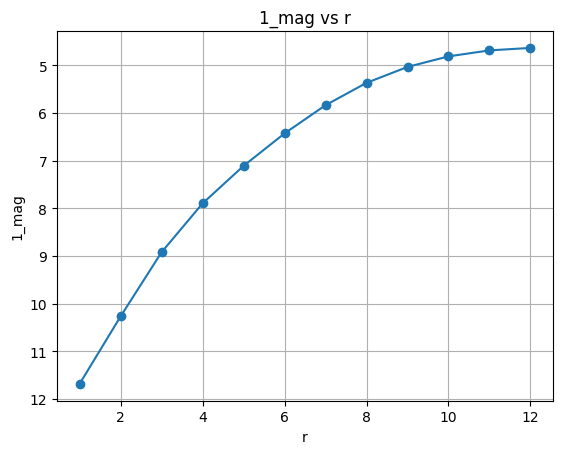

In [36]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
from photutils.centroids import centroid_sources, centroid_com
from astropy.stats import sigma_clipped_stats
import csv
import os

# Directorio en donde se encuentran las imágenes FITS
carpeta = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-MIPS"

# Búsqueda de los archivos .fits
archivos = glob.glob(carpeta + r"\*.fits")

# Impresión de los archivos encontrados y guardado de nombre del archivo en lista
nombres = []
for j in archivos:
    if carpeta in j:
        nombres.append(j.replace(carpeta + "\\", ""))

if nombres:
    l = len(nombres)
    print(f"\n Su carpeta tiene {l} archivos .fits \n")
    print(f"No. 1: {nombres[0]}")
    print(f"          ....            ")
    print(f"No. {l}: {nombres[l-1]}")
else:
    print("\n Su carpeta no tiene archivos .fits \n")

# Carga del catálogo con coordenadas e identificador :  RA DEC ID
# !!!!!!! FORMATO DEBE ESTAR EN: RA - DEC - ID
import numpy as np

archivo_catalogo = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits_gaia_results.txt"

catalogo = open(archivo_catalogo, "r")
objects = catalogo.readlines()
catalogo.close()
L_O = [i.split() for i in objects]
ra = [i[0] for i in L_O]
dec = [i[1] for i in L_O]
id = [i[2] for i in L_O]

catalogo_decimal = SkyCoord(ra, dec, unit=(u.degree))
catalogo = list(zip(catalogo_decimal.ra.deg, catalogo_decimal.dec.deg, id))

"""____________________________________________________________________________________"""
# Definición de parámetros fotométricos
r_values = np.arange(1, 13)  # Lista de valores de apertura en px
r_in_values = np.arange(1, 13)  # Lista de valores de radio interno anillo cielo
r_out = 15  # Radio externo constante
center_box_size = 7
"""_______________________________________________________________________________________"""

# Función principal de fotometría
def Photometry_Data_Table(
    fits_name, fits_path, catalogo, r, r_in, r_out, center_box_size
):
    F = fits.open(fits_path)
    FitsData = F
    w = WCS(FitsData[0].header)
    fits_data = FitsData[0].data
    fits_header = FitsData[0].header
    itime = fits_header["EXPTIME"]
    ifilter = fits_header["CHNLNUM"]
    DateObs = fits_header["DATE_OBS"]
    target = fits_header["OBJECT"]
    # epadu = fits_header['GAIN']
    F.close()

    image = fits_data

    def is_in_pic(w, image, ra, dec):
        ra_max, dec_max = w.array_index_to_world_values(0, 0)
        ra_min, dec_min = w.array_index_to_world_values(image.shape[0], image.shape[1])
        if ra_min > ra_max:
            ra_min = w.array_index_to_world_values(0, 0)[0]
            ra_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[0]
        if dec_min > dec_max:
            dec_min = w.array_index_to_world_values(0, 0)[1]
            dec_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[1]

        return (ra < ra_max) & (ra > ra_min) & (dec < dec_max) & (dec > dec_min)

    NewListO = open(f"Objectlist_{fits_name}.out", "w")
    object_counter = 0
    for j in range(len(catalogo)):
        if is_in_pic(w, image, catalogo[j][0], catalogo[j][1]):
            object_counter += 1
            X, Y = SkyCoord(
                catalogo[j][0], catalogo[j][1], frame="icrs", unit="deg"
            ).to_pixel(w)
            NewListO.write(
                f"{catalogo[j][0]} {catalogo[j][1]} {catalogo[j][2]} {X} {Y}\n"
            )
    NewListO.close()
    print(
        f"\n Se han encontrado {object_counter} objetos del catálogo en el archivo .fits \n"
    )

    if object_counter == 0:
        return None

    with open(f"Objectlist_{fits_name}.out", "r") as Obj:
        ListObj = Obj.readlines()

    Final_LO = [i.split()[:5] for i in ListObj]
    RA, DEC, ID, x, y = zip(*Final_LO)
    Final_List = np.array(list(zip(RA, DEC, x, y)), dtype=float)
    ID = np.array(ID, dtype="U20")

    mm = [0 < i[2] < (image.shape[0] - 1) for i in Final_List]
    ID = ID[mm]
    Final_List = Final_List[mm]
    nn = [0 < i[3] < (image.shape[1] - 1) for i in Final_List]
    ID = ID[nn]
    Final_List = Final_List[nn]

    u, c = np.unique(ID, return_counts=True)
    dup = u[c > 1]
    for j in dup:
        m = 0
        for i in range(len(ID)):
            if ID[i] == j:
                m += 0.1
                ID[i] = ID[i] + str(m)

    _, _, x_init, y_init = zip(*Final_List)

    x, y = centroid_sources(
        image, x_init, y_init, box_size=center_box_size, centroid_func=centroid_com
    )
    X, Y = np.array(x), np.array(y)
    NewIDS = np.array(ID)

    is_nan = ~np.isnan(X)
    x, y = X[is_nan], Y[is_nan]
    Final_List2 = Final_List[is_nan]
    NewIDS = NewIDS[is_nan]

    starloc = list(zip(x, y))

    if ifilter == 1:  # 24 um
        zmag = 11.76
        epadu = 5.0
    elif ifilter == 2:  # 70 um
        zmag = 8.29
        epadu = 7.0
    elif ifilter == 3:  # 160 um
        zmag = 5.06
        epadu = 7.0
    else:
        zmag = 5.06
        epadu = 7.0
    print(zmag)

    aperture = CircularAperture(starloc, r=r)
    annulus_aperture = CircularAnnulus(starloc, r_in=r_in, r_out=r_out)
    apers = [aperture, annulus_aperture]
    phot_table = aperture_photometry(image, apers)

    name_mag = str(ifilter)
    bkg_mean = phot_table["aperture_sum_1"] / annulus_aperture.area
    area_aper = np.array(aperture.area_overlap(image))
    bkg_sum = bkg_mean * area_aper
    final_sum = phot_table["aperture_sum_0"] - bkg_sum
    phot_table["flux"] = final_sum
    phot_table["flux"].info.format = "%.8g"
    phot_table[name_mag + "_mag"] = (
        zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
    )
    phot_table[name_mag + "_mag"].info.format = "%.8g"

    mean, median, std = sigma_clipped_stats(image, sigma=3.0)
    stdev = std
    phot_table[name_mag + "_mag_err"] = (
        1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum
    )
    phot_table[name_mag + "_mag_err"].info.format = "%.8g"

    phot_table["RA"] = [i[0] for i in Final_List2]
    phot_table["DEC"] = [i[1] for i in Final_List2]
    phot_table["ID"] = NewIDS
    phot_table["DATE-OBS"] = DateObs
    phot_table["OBJECT"] = fits_header["OBJECT"]

    index_nan = np.argwhere(np.isnan(phot_table[name_mag + "_mag"].data))
    phot_table.remove_rows(index_nan)

    return phot_table


val = []
ii = 0
# print(r_)
# Procesar cada archivo .fits para cada combinación de r y r_in
for fits_path, fits_name in zip(archivos, nombres):
    # ii+=1
    # print(ii)
    for r in r_values:
        if ii >= len(r_in_values):
            print("El índice ii ha superado la longitud de r_in_values")
            break
        print(ii)
        photom = Photometry_Data_Table(
            fits_name, fits_path, catalogo, r, r_in_values[ii], r_out, center_box_size
        )
        if photom is not None:
            output_filename = (
                f"Results_{fits_name.split('.')[0]}_r{r}_rIn{r_in_values[ii]}.csv"
            )
            if os.path.exists(output_filename):
                os.remove(output_filename)

            photom.write(output_filename, format="ascii.csv")
            print(f"Resultados guardados en {output_filename}")
            # Leer el archivo CSV generado y mostrar los valores de la fila 2 y columna 7
            with open(output_filename, mode="r") as csvfile:
                csv_reader = csv.reader(csvfile)
                rows = list(csv_reader)
                if len(rows) > 2 and len(rows[2]) > 7:
                    print(
                        f"Valores de fila 2, columna 7 en {output_filename}: {rows[1][6]}"
                    )
                    val.append(float(rows[1][6]))
                else:
                    print(
                        f"No se pudo obtener la fila 2, columna 7 de {output_filename}"
                    )
        ii = ii + 1
print("Fotometría completa.")
print(val)

plt.plot(r_values, val, marker="o", linestyle="-")
plt.gca().invert_yaxis()
plt.xlabel("r")
plt.ylabel("1_mag")
plt.title("1_mag vs r")
plt.grid(True)

### 4.3 Apertura (r) para WISE


 Su carpeta tiene 4 archivos .fits 

No. 1: W_1_3_4.fits
          ....            
No. 4: W_4_22.fits
0

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r1_rIn1.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r1_rIn1.csv: 12.272324
1

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r2_rIn2.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r2_rIn2.csv: 10.876835
2

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r3_rIn3.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r3_rIn3.csv: 10.169506
3

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r4_rIn4.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r4_rIn4.csv: 9.7646446
4

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r5_rIn5.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r5_rIn5.csv: 9.5277716
5

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r6_rIn6.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r6_rIn6.csv: 9.389441
6

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r7_rIn7.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r7_rIn7.csv: 9.3080436
7

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r8_rIn8.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r8_rIn8.csv: 9.2577088
8

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r9_rIn9.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r9_rIn9.csv: 9.2223855
9

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r10_rIn10.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r10_rIn10.csv: 9.1924909
10

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r11_rIn11.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r11_rIn11.csv: 9.1626247
11

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r12_rIn12.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r12_rIn12.csv: 9.1309131
12

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r13_rIn13.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r13_rIn13.csv: 9.0984429
13

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r14_rIn14.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r14_rIn14.csv: 9.0680299
14

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:196: RuntimeWarning: invalid value encountered in sqrt
  1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum


Resultados guardados en Results_W_1_3_4_r15_rIn15.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r15_rIn15.csv: 9.0426647
15

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_W_1_3_4_r16_rIn16.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r16_rIn16.csv: 9.0240886
16

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_W_1_3_4_r17_rIn17.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r17_rIn17.csv: 9.0120857
17

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_W_1_3_4_r18_rIn18.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r18_rIn18.csv: 9.0044688
18

 Se han encontrado 721 objetos del catálogo en el archivo .fits 

20.5


C:\Users\eduar\AppData\Local\Temp\ipykernel_17544\590562249.py:189: RuntimeWarning: invalid value encountered in log10
  zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)


Resultados guardados en Results_W_1_3_4_r19_rIn19.csv
Valores de fila 2, columna 7 en Results_W_1_3_4_r19_rIn19.csv: 8.9980367
El índice ii ha superado la longitud de r_in_values
El índice ii ha superado la longitud de r_in_values
El índice ii ha superado la longitud de r_in_values
Fotometría completa.
[12.272324, 10.876835, 10.169506, 9.7646446, 9.5277716, 9.389441, 9.3080436, 9.2577088, 9.2223855, 9.1924909, 9.1626247, 9.1309131, 9.0984429, 9.0680299, 9.0426647, 9.0240886, 9.0120857, 9.0044688, 8.9980367]


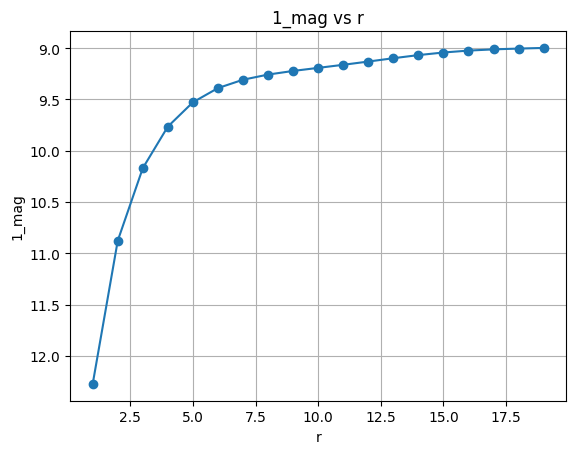

In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
from photutils.centroids import centroid_sources, centroid_com
from astropy.stats import sigma_clipped_stats
import csv
import os

# Directorio en donde se encuentran las imágenes FITS
carpeta = r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE"

# Búsqueda de los archivos .fits
archivos = glob.glob(carpeta + r"\*.fits")

# Impresión de los archivos encontrados y guardado de nombre del archivo en lista
nombres = []
for j in archivos:
    if carpeta in j:
        nombres.append(j.replace(carpeta + "\\", ""))

if nombres:
    l = len(nombres)
    print(f"\n Su carpeta tiene {l} archivos .fits \n")
    print(f"No. 1: {nombres[0]}")
    print(f"          ....            ")
    print(f"No. {l}: {nombres[l-1]}")
else:
    print("\n Su carpeta no tiene archivos .fits \n")

# Carga del catálogo con coordenadas e identificador :  RA DEC ID
# !!!!!!! FORMATO DEBE ESTAR EN: RA - DEC - ID
import numpy as np

archivo_catalogo = (
    r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits_gaia_results.txt"
)

catalogo = open(archivo_catalogo, "r")
objects = catalogo.readlines()
catalogo.close()
L_O = [i.split() for i in objects]
ra = [i[0] for i in L_O]
dec = [i[1] for i in L_O]
id = [i[2] for i in L_O]

catalogo_decimal = SkyCoord(ra, dec, unit=(u.degree))
catalogo = list(zip(catalogo_decimal.ra.deg, catalogo_decimal.dec.deg, id))

"""__________________________________________________________________________________"""
# Definición de parámetros fotométricos
r_values = np.arange(1, 20)  # Lista de valores de apertura en px
r_in_values = np.arange(1, 20)  # Lista de valores de radio interno anillo cielo
r_out = 20  # Radio externo constante
center_box_size = 7
"""___________________________________________________________________________________"""

# Función principal de fotometría
def Photometry_Data_Table(
    fits_name, fits_path, catalogo, r, r_in, r_out, center_box_size
):
    F = fits.open(fits_path)
    FitsData = F
    w = WCS(FitsData[0].header)
    fits_data = FitsData[0].data
    fits_header = FitsData[0].header
    # print(w.array_shape)
    # print(w.world_axis_physical_types)
    # airmass = fits_header['AIRMASS']
    # itime  = fits_header['EXPTIME']
    ifilter = fits_header["BAND"]
    DateObs = fits_header["MIDOBS"]
    target = fits_header["COADDID"]
    #  epadu = fits_header['GAIN']
    F.close()

    image = fits_data

    def is_in_pic(w, image, ra, dec):
        ra_max, dec_max = w.array_index_to_world_values(0, 0)
        ra_min, dec_min = w.array_index_to_world_values(image.shape[0], image.shape[1])
        if ra_min > ra_max:
            ra_min = w.array_index_to_world_values(0, 0)[0]
            ra_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[0]
        if dec_min > dec_max:
            dec_min = w.array_index_to_world_values(0, 0)[1]
            dec_max = w.array_index_to_world_values(image.shape[0], image.shape[1])[1]

        return (ra < ra_max) & (ra > ra_min) & (dec < dec_max) & (dec > dec_min)

    NewListO = open(f"Objectlist_{fits_name}.out", "w")
    object_counter = 0
    for j in range(len(catalogo)):
        if is_in_pic(w, image, catalogo[j][0], catalogo[j][1]):
            object_counter += 1
            X, Y = SkyCoord(
                catalogo[j][0], catalogo[j][1], frame="icrs", unit="deg"
            ).to_pixel(w)
            NewListO.write(
                f"{catalogo[j][0]} {catalogo[j][1]} {catalogo[j][2]} {X} {Y}\n"
            )
    NewListO.close()
    print(
        f"\n Se han encontrado {object_counter} objetos del catálogo en el archivo .fits \n"
    )

    if object_counter == 0:
        return None

    with open(f"Objectlist_{fits_name}.out", "r") as Obj:
        ListObj = Obj.readlines()

    Final_LO = [i.split()[:5] for i in ListObj]
    RA, DEC, ID, x, y = zip(*Final_LO)
    Final_List = np.array(list(zip(RA, DEC, x, y)), dtype=float)
    ID = np.array(ID, dtype="U20")

    mm = [0 < i[2] < (image.shape[0] - 1) for i in Final_List]
    ID = ID[mm]
    Final_List = Final_List[mm]
    nn = [0 < i[3] < (image.shape[1] - 1) for i in Final_List]
    ID = ID[nn]
    Final_List = Final_List[nn]

    u, c = np.unique(ID, return_counts=True)
    dup = u[c > 1]
    for j in dup:
        m = 0
        for i in range(len(ID)):
            if ID[i] == j:
                m += 0.1
                ID[i] = ID[i] + str(m)

    _, _, x_init, y_init = zip(*Final_List)

    x, y = centroid_sources(
        image, x_init, y_init, box_size=center_box_size, centroid_func=centroid_com
    )
    X, Y = np.array(x), np.array(y)
    NewIDS = np.array(ID)

    is_nan = ~np.isnan(X)
    x, y = X[is_nan], Y[is_nan]
    Final_List2 = Final_List[is_nan]
    NewIDS = NewIDS[is_nan]

    starloc = list(zip(x, y))

    if ifilter == 1:
        zmag = 20.5
        itime = 7.7
        epadu = 3.20
    elif ifilter == 2:
        zmag = 19.5
        itime = 7.7
        epadu = 3.83
    elif ifilter == 3:
        zmag = 18.0
        itime = 8.8
        epadu = 6.83
    elif ifilter == 4:
        zmag = 13.0
        itime = 8.8
        epadu = 24.50

    else:
        zmag = 8.8
        itime = 7.7
        epadu = 24.50
    print(zmag)

    aperture = CircularAperture(starloc, r=r)
    annulus_aperture = CircularAnnulus(starloc, r_in=r_in, r_out=r_out)
    apers = [aperture, annulus_aperture]
    phot_table = aperture_photometry(image, apers)

    name_mag = str(ifilter)
    bkg_mean = phot_table["aperture_sum_1"] / annulus_aperture.area
    area_aper = np.array(aperture.area_overlap(image))
    bkg_sum = bkg_mean * area_aper
    final_sum = phot_table["aperture_sum_0"] - bkg_sum
    phot_table["flux"] = final_sum
    phot_table["flux"].info.format = "%.8g"
    phot_table[name_mag + "_mag"] = (
        zmag - 2.5 * np.log10(final_sum) - 2.5 * np.log10(itime)
    )
    phot_table[name_mag + "_mag"].info.format = "%.8g"

    mean, median, std = sigma_clipped_stats(image, sigma=3.0)
    stdev = std
    phot_table[name_mag + "_mag_err"] = (
        1.0857 * np.sqrt(final_sum / epadu + area_aper * stdev**2) / final_sum
    )
    phot_table[name_mag + "_mag_err"].info.format = "%.8g"

    phot_table["RA"] = [i[0] for i in Final_List2]
    phot_table["DEC"] = [i[1] for i in Final_List2]
    phot_table["ID"] = NewIDS
    phot_table["DATE-OBS"] = DateObs
    phot_table["COADDID"] = fits_header["COADDID"]

    index_nan = np.argwhere(np.isnan(phot_table[name_mag + "_mag"].data))
    phot_table.remove_rows(index_nan)

    return phot_table


val = []
ii = 0
# print(r_)
# Procesar cada archivo .fits para cada combinación de r y r_in
for fits_path, fits_name in zip(archivos, nombres):
    # ii+=1
    # print(ii)
    for r in r_values:
        if ii >= len(r_in_values):
            print("El índice ii ha superado la longitud de r_in_values")
            break
        print(ii)
        photom = Photometry_Data_Table(
            fits_name, fits_path, catalogo, r, r_in_values[ii], r_out, center_box_size
        )
        if photom is not None:
            output_filename = (
                f"Results_{fits_name.split('.')[0]}_r{r}_rIn{r_in_values[ii]}.csv"
            )
            if os.path.exists(output_filename):
                os.remove(output_filename)

            photom.write(output_filename, format="ascii.csv")
            print(f"Resultados guardados en {output_filename}")
            # Leer el archivo CSV generado y mostrar los valores de la fila 2 y columna 7
            with open(output_filename, mode="r") as csvfile:
                csv_reader = csv.reader(csvfile)
                rows = list(csv_reader)
                if len(rows) > 2 and len(rows[2]) > 7:
                    print(
                        f"Valores de fila 2, columna 7 en {output_filename}: {rows[1][6]}"
                    )
                    val.append(float(rows[1][6]))
                else:
                    print(
                        f"No se pudo obtener la fila 2, columna 7 de {output_filename}"
                    )
        ii = ii + 1
print("Fotometría completa.")
print(val)

plt.plot(r_values, val, marker="o", linestyle="-")
plt.gca().invert_yaxis()
plt.xlabel("r")
plt.ylabel("1_mag")
plt.title("1_mag vs r")
plt.grid(True)

## 5. Corrección por Paralaje
Una ves se obtienen las magnitudes en cada filtro se debe hacer una corrección por paralaje, para los objetos. Por esto a las tablas obtenidas se les debe agregar el paralaje que se obtuvo en el catalogo Original de GAIA. Para esto haremos la corrección y filtrado de todos los paralajes mayores a 0.2, para dejar objetos con paralaje positivo

In [32]:
import pandas as pd

# Cargar el catálogo original de GAIA, especificando el separador de espacio
archivo_catalogo = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits_gaia_results_all.txt", sep='\s+')

# Filtrar los objetos que tienen un valor ( error del paralaje/ paralaje ) > 0.2

archivo_catalogo_filtrado = archivo_catalogo[(archivo_catalogo["parallax_error"]/archivo_catalogo['parallax']) > 0.2]
archivo_catalogo_filtrado = archivo_catalogo_filtrado.rename(columns={"SOURCE_ID": "OBJECT_ID"})

# Guardar el DataFrame filtrado en un nuevo archivo CSV
archivo_catalogo_filtrado.to_csv(r"D:\GitHub\Tecnicas\Gaia_results_fil_Parallax.csv", index=False)

print("El archivo filtrado ha sido guardado con éxito.")

El archivo filtrado ha sido guardado con éxito.


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\eduar\AppData\Local\Temp\ipykernel_25948\2187293006.py:4: SyntaxWarning: invalid escape sequence '\s'
  archivo_catalogo = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\W_1_3_4.fits_gaia_results_all.txt", sep='\s+')


## 6 Calculo de Magnitudes Absolutas y Diagramas Color Color
Ahora se calculan las magnitudes absolutas teniendo en cuenta la correction por paralaje ya realizada y la corrección por Reddening, con lo cual obtendremos valores desenrrojecidos y absolutos.
Para realizar la corrección por Reddening en cada longitud de onda que se tiene, es importante tener en cuenta la ley de la extinción:
$$
m_\lambda = M_\lambda + 5log(d/10 pc) + A_\lambda
$$
$$
m_\lambda = M_\lambda + 5(log(d) - log(10 pc)) + A_\lambda
$$
$$
m_\lambda = M_\lambda + 5(log(d) - 1) + A_\lambda\\
$$
$$
m_\lambda - M_\lambda = 5log(d) - 5 + A_\lambda\\
$$
$$
M_\lambda = m_\lambda - 5log(d) + 5 - A_\lambda\\
$$
Donde d es la distancia en Parsec.
$$
d = 1/Paralaje (arsec) = 1000/Paralaje (miliarcsec)
$$

Para encontrar el valor de $A_\lambda$ es necesario considerar la relación:
$$
R_v = A_v / E_(B-V) = 3.1
$$

De acuerdo a la herramienta WEBDA disponible en:https://webda.physics.muni.cz/cgi-bin/ocl_page.cgi?cluster=NGC2264 
Para la region de "NGC2264" el Reddening, o el exceso de color en el azul menos el visual es de:
$$
E (B-V) =0.051 mag
$$
$$
A_v = 0.051 * 3.1\\
A_v = 0.1581 
$$
Por lo que para obtener el valor correspondiente de $A_\lambda$ se requiere  utilizar la relación para cada filtro.
Esta relación se obtiene de la herramienta web: http://stev.oapd.inaf.it/cgi-bin/cmd_3.7


| Filter      | J (1.2)        | H (1.6)      | Ks (2.1)       | IRAC_3.6  | IRAC_4.5  | IRAC_5.8  | IRAC_8.0  | MIPS_24   | MIPS_70   | MIPS_160  | W1  (3.4)     | W2  (4.6)     | W3  (12)     | W4  (22)      |
|-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| λeff (Å)    | 12375.60  | 16476.02  | 21620.75  | 35612.35  | 45096.26  | 56894.50  | 79576.25  | 238436.42 | 725562.13 | 1569627.15| 33791.90  | 46292.96  | 123337.67 | 222532.73 |
| ωeff (Å)    | 1688      | 2543      | 2714      | 6917      | 8732      | 12804     | 25677     | 52966     | 213007    | 357547    | 6826      | 10510     | 64563     | 39452     |
| Aλ/AV       | 0.28665   | 0.18082   | 0.11675   | 0.05228   | 0.03574   | 0.02459   | 0.01433   | 0.00245   | 0.00041   | 0.00012   | 0.05688   | 0.03427   | 0.00707   | 0.00274   |

Finalmente para obtener la corrección por reddening, $A_\lambda$, basta con realizar el producto entre la cantidad obtenida $A_v$ y cada valor de la tabla.

 
Lois diagramas color - color deben ser graficados con las magnitudes absolutas.

### 6.1 [3.6 - 4.5] vs [5.8 - 8.0] que es igual a [I1 - I2] vs [I3 - I4]

En total se encontraron 94 objetos que coinciden con los filtros aplicados.


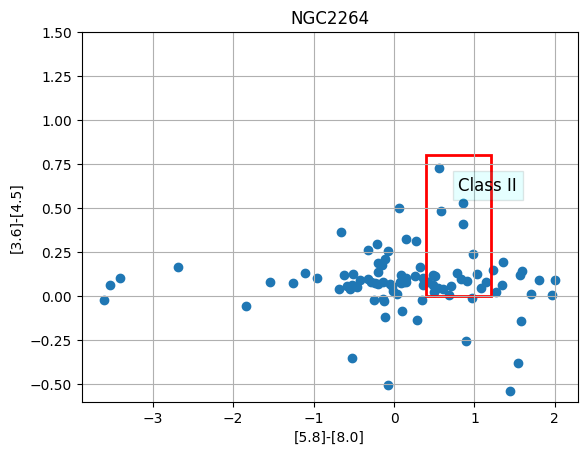

In [102]:
# Leer los archivos CSV obtenidos para IRAC
irac = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC\Table_IRAC_NGC2264_4.csv").add_prefix('IRAC_')

# Cargar el catalogo original GAIA corregido con paralajes
cat = pd.read_csv(r"D:\GitHub\Tecnicas\Gaia_results_fil_Parallax.csv")

irac = irac.rename(columns={"IRAC_OBJECT_ID": "OBJECT_ID"})

# Unir los DataFrames por el ID, añadiendo sufijos para identificar el origen de cada columna
df = pd.merge(cat, irac, on="OBJECT_ID", how="inner")

df = df.filter(regex="^(?!.*DATE-OBS).*")
df = df.filter(regex="^(?!.*DATEOBS).*")

# corrección reddening
redd = 0.051
av = redd * 3.1

a_I1 = av * 0.05228  # 3.6
a_I2 = av * 0.03574  # 4.5
a_I3 = av * 0.02459  # 5.8
a_I4 = av * 0.01433  # 8.0

df["Mag_I1"] = df['IRAC_1_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I1
df["Mag_I2"] = df['IRAC_2_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I2
df["Mag_I3"] = df['IRAC_3_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I3
df["Mag_I4"] = df['IRAC_4_mag_1'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I4

print(f"En total se encontraron {df.shape[0]} objetos que coinciden con los filtros aplicados.")

# Diagrama [3.6-4.5] vs [5.8-8.0]

plt.scatter(df['Mag_I3']-df['Mag_I4'], df['Mag_I1']-df['Mag_I2'])
plt.xlabel('[5.8]-[8.0]')
plt.ylabel('[3.6]-[4.5]')
plt.title('NGC2264')

#plt.xlim(-1, 2.2)
plt.ylim(-0.6, 1.5)
plt.gca().add_patch(plt.Rectangle((0.4, 0.0), 0.8, 0.8, edgecolor='r', facecolor='none', lw=2))  # Cuadro cyan
plt.text(0.8, 0.6, "Class II", fontsize=12, bbox=dict(facecolor="cyan", alpha=0.1))
plt.grid(True)

#### Posibles candidatas a estrellas Clase II con discos protoplanetarios

Las estrellas que caen en la region delimitada por el cuadro rojo en la figura superior, se conocen como estrellas de clase II y son candidatas a ser estrellas que pueden tener discos protoplanetarios en formación.


In [106]:
# Filtrar el DataFrame basado en las condiciones para x e y
filtered_df = df.loc[
    ((df["Mag_I3"] - df["Mag_I4"]) > 0.4)
    & ((df["Mag_I3"] - df["Mag_I4"]) < 1.1)
    & ((df["Mag_I1"] - df["Mag_I2"]) > 0)
    & ((df["Mag_I1"] - df["Mag_I2"]) < 0.8),
    ["OBJECT_ID"],
]

# Mostrar los resultados
#print(filtered_df)
print(f"De acuerdo al filtro aplicado hay {filtered_df.shape[0]} estrellas candidatas a tener discos protoplanetarios")

De acuerdo al filtro aplicado hay 19 estrellas candidatas a tener discos protoplanetarios


### 6.2  [G - 3.6] vs [4.5 - 24]  que es igual a [G - I1] vs [I2 - M1]

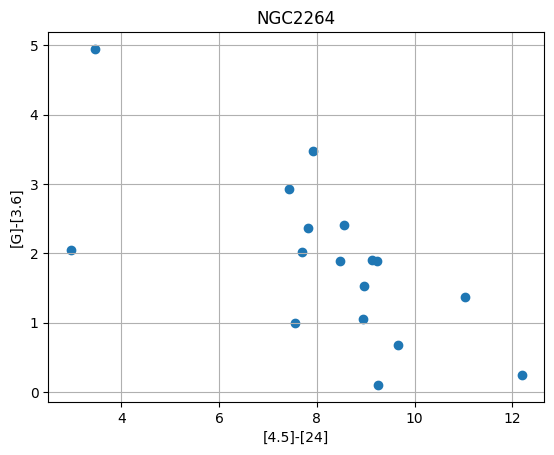

In [51]:
# Leer los archivos CSV obtenidos para IRAC
irac = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC\Table_IRAC_NGC2264_4.csv").add_prefix('IRAC_')
mips = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-MIPS\Table_MIPS_NGC 2264.csv").add_prefix('MIPS_')

# Cargar el catalogo original GAIA corregido con paralajes
cat = pd.read_csv(r"D:\GitHub\Tecnicas\Gaia_results_fil_Parallax.csv")

irac = irac.rename(columns={"IRAC_OBJECT_ID": "OBJECT_ID"})
mips = mips.rename(columns={"MIPS_OBJECT_ID": "OBJECT_ID"})

# Unir los DataFrames por el ID, añadiendo sufijos para identificar el origen de cada columna
df = pd.merge(cat, irac, on="OBJECT_ID", how="inner")
df = pd.merge(df, mips, on="OBJECT_ID", how="inner")


df = df.filter(regex="^(?!.*DATE-OBS).*")
df = df.filter(regex="^(?!.*DATEOBS).*")

# corrección reddening
redd = 0.051
av = redd * 3.1

a_G = av * 0.83627
a_I1 = av * 0.05228  # 3.6
a_I2 = av * 0.03574  # 4.5
a_I3 = av * 0.02459  # 5.8
a_I4 = av * 0.01433  # 8.0
a_M1 = av * 0.00245  # 24
a_M2 = av * 0.00041  # 70
a_M3 = av * 0.00012  # 160

df['Mag_G'] = df['phot_g_mean_mag'] - 5 * np.log10(1000 / df["parallax"]) + 5 - a_G
df["Mag_I1"] = df['IRAC_1_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I1
df["Mag_I2"] = df['IRAC_2_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I2
df["Mag_I3"] = df['IRAC_3_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I3
df["Mag_I4"] = df['IRAC_4_mag_1'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I4
df["Mag_M1"] = df['MIPS_1_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_M1
df["Mag_M2"] = df['MIPS_2_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_M2

# Diagrama  [G - 3.6] vs [4.5 - 24]

plt.scatter(df['Mag_I2']-df['Mag_M1'], df['Mag_G']-df['Mag_I1'])
plt.xlabel('[4.5]-[24]')
plt.ylabel('[G]-[3.6]')
plt.title('NGC2264')
plt.grid(True)

### 6.3  [G - 3.6] vs [4.5 - W4]  que es igual a [G - I1] vs [I2 - W4]

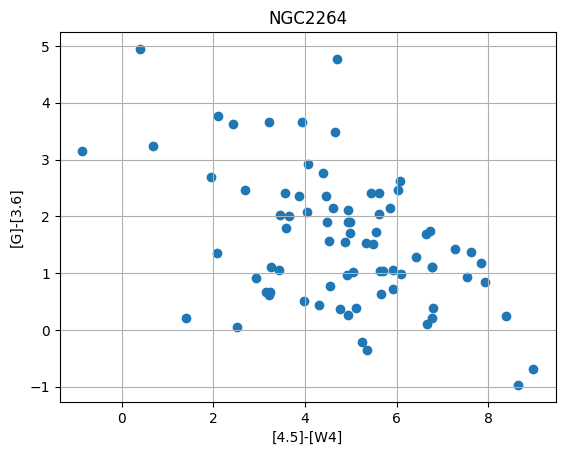

In [52]:
# Leer los archivos CSV obtenidos para IRAC
irac = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC\Table_IRAC_NGC2264_4.csv").add_prefix('IRAC_')
wise = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\Table_WISE_0999p106_ac51.csv").add_prefix('WISE_')

# Cargar el catalogo original GAIA corregido con paralajes
cat = pd.read_csv(r"D:\GitHub\Tecnicas\Gaia_results_fil_Parallax.csv")

irac = irac.rename(columns={"IRAC_OBJECT_ID": "OBJECT_ID"})
wise = wise.rename(columns={"WISE_OBJECT_ID": "OBJECT_ID"})

# Unir los DataFrames por el ID, añadiendo sufijos para identificar el origen de cada columna
df = pd.merge(cat, irac, on="OBJECT_ID", how="inner")
df = pd.merge(df, wise, on="OBJECT_ID", how="inner")


df = df.filter(regex="^(?!.*DATE-OBS).*")
df = df.filter(regex="^(?!.*DATEOBS).*")

# corrección reddening
redd = 0.051
av = redd * 3.1

a_G = av * 0.83627
a_I1 = av * 0.05228  # 3.6
a_I2 = av * 0.03574  # 4.5
a_I3 = av * 0.02459  # 5.8
a_I4 = av * 0.01433  # 8.0
a_W1 = av * 0.05688  # 3.4
a_W2 = av * 0.03427  # 4.6
a_W3 = av * 0.00707  # 12
a_W4 = av * 0.00274  # 22


df['Mag_G'] = df['phot_g_mean_mag'] - 5 * np.log10(1000 / df["parallax"]) + 5 - a_G
df["Mag_I1"] = df['IRAC_1_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I1
df["Mag_I2"] = df['IRAC_2_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I2
df["Mag_I3"] = df['IRAC_3_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I3
df["Mag_I4"] = df['IRAC_4_mag_1'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_I4
df["Mag_W1"] = df['WISE_1_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_W1
df["Mag_W2"] = df['WISE_2_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_W2
df["Mag_W3"] = df['WISE_3_mag_0'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_W3
df["Mag_W4"] = df['WISE_4_mag_1'] - 5 * np.log10(1000/df["parallax"]) + 5 - a_W4

# Diagrama  [G - 3.6] vs [4.5 - W4]

plt.scatter(df['Mag_I2']-df['Mag_W4'], df['Mag_G']-df['Mag_I1'])
plt.xlabel('[4.5]-[W4]')
plt.ylabel('[G]-[3.6]')
plt.title('NGC2264')
plt.grid(True)

### 7. SEDs
Para generar los SEDs de las estrellas debemos obtener la mayor cantidad de estrellas que tengan información en todos los filtros posibles. Para esto vamos a generar un cruce entre todos los filtros y la tabla del catalogo corregido con el paralaje.
Esto nos genera una tabla definitiva con las magnitudes aparentes calculadas para todos los objetos que resultan al final del cruce, y para todos los filtros que se han utilizado.


In [5]:
# OBTENER LA TABLA DE MAGNITUDES APARENTES

import pandas as pd
import numpy as np
 
# Leer los archivos CSV obtenidos
tmass = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-2MASS\2MASS_catalog.txt_gaia_results.csv").add_prefix('2MASS_')
irac = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-IRAC\Table_IRAC_NGC2264_4.csv").add_prefix('IRAC_')
mips = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-MIPS\Table_MIPS_NGC 2264.csv").add_prefix('MIPS_')
wise = pd.read_csv(r"D:\GitHub\Tecnicas\NGC2264\NGC2264-WISE\Table_WISE_0999p106_ac51.csv").add_prefix('WISE_')

# Cargar el catalogo original GAIA
cat = pd.read_csv(r"D:\GitHub\Tecnicas\Gaia_results_fil_Parallax.csv")

# Asegurar que la columna 'OBJECT_ID' no tenga prefijo en cada DataFrame para permitir la unión
tmass = tmass.rename(columns={"2MASS_OBJECT_ID": "OBJECT_ID"})
irac = irac.rename(columns={"IRAC_OBJECT_ID": "OBJECT_ID"})
mips = mips.rename(columns={"MIPS_OBJECT_ID": "OBJECT_ID"})
wise = wise.rename(columns={"WISE_OBJECT_ID": "OBJECT_ID"})
cat = cat.rename(columns={"GAIA_OBJECT_ID": "OBJECT_ID"})

# Unir los DataFrames por el ID, añadiendo sufijos para identificar el origen de cada columna
df_merged = pd.merge(cat, tmass, on="OBJECT_ID", how="inner")
df_merged = pd.merge(df_merged, irac, on="OBJECT_ID", how="inner")
df_merged = pd.merge(df_merged, wise, on="OBJECT_ID", how="inner")
df_merged = pd.merge(df_merged, mips, on="OBJECT_ID", how="inner")

df_merged= df_merged.filter(regex="^(?!.*DATE-OBS).*")
df_merged = df_merged.filter(regex="^(?!.*DATEOBS).*")

# Guardar el DataFrame resultante en un nuevo archivo CSV
df_merged.to_csv("Table_mag_aparentes.csv", index=False)
print(f"Se ha generado la tabla de magnitudes aparentes para {df_merged.shape[0]} objetos que tienen datos en todos los filtros.")

Se ha generado la tabla de magnitudes aparentes para 15 objetos que tienen datos en todos los filtros.


In [6]:
#OBTENER LA TABLA DE MAGNITUDES ABSOLUTAS

#cargar la tabla de magnitudes aparentes

table = pd.read_csv(r"D:\GitHub\Tecnicas\Table_mag_aparentes.csv")

redd = 0.051
av = redd *3.1

# Obtener a_lambda para cada filtro
a_G = av*0.83627 
a_j = av*0.28665 #1.2
a_h = av*0.18082 #1.6
a_k = av*0.11675 #2.1
a_I1 = av*0.05228 #3.6
a_I2 = av*0.03574 #4.5
a_I3 = av*0.02459 #5.8
a_I4 = av*0.01433 #8.0
a_M1 = av*0.00245 #24
a_M2 = av*0.00041 #70
a_M3 = av*0.00012 #160
a_W1 = av*0.05688 #3.4
a_W2 = av*0.03427 #4.6
a_W3 = av *0.00707 #12
a_W4 = av*0.00274 #22

# Calcular las magnitudes absolutas para cada filtro
table['Mag_G'] = table['phot_g_mean_mag'] - 5 * np.log10(1000 / table["parallax"]) + 5 - a_G
table['Mag_J']  = table['2MASS_Jmag']   - 5 * np.log10(1000/table['parallax']) + 5 - a_j
table["Mag_H"]  = table["2MASS_Hmag"]   - 5 * np.log10(1000/table["parallax"]) + 5 - a_h
table["Mag_K"]  = table["2MASS_Kmag"]   - 5 * np.log10(1000/table["parallax"]) + 5 - a_k
table["Mag_I1"] = table['IRAC_1_mag_0'] - 5 * np.log10(1000/table["parallax"]) + 5 - a_I1
table["Mag_I2"] = table['IRAC_2_mag_0'] - 5 * np.log10(1000/table["parallax"]) + 5 - a_I2
table["Mag_I3"] = table['IRAC_3_mag_0'] - 5 * np.log10(1000/table["parallax"]) + 5 - a_I3
table["Mag_I4"] = table['IRAC_4_mag_1'] - 5 * np.log10(1000/table["parallax"]) + 5 - a_I4
table["Mag_M1"] = table['MIPS_1_mag_0'] - 5 * np.log10(1000/table["parallax"]) + 5 - a_M1
table["Mag_M2"] = table['MIPS_2_mag_0'] - 5 * np.log10(1000/table["parallax"]) + 5 - a_M2
table["Mag_W1"] = table['WISE_1_mag_0'] - 5 * np.log10(1000/table["parallax"]) + 5 - a_W1
table["Mag_W2"] = table['WISE_2_mag_0'] - 5 * np.log10(1000/table["parallax"]) + 5 - a_W2
table["Mag_W3"] = table['WISE_3_mag_0'] - 5 * np.log10(1000/table["parallax"]) + 5 - a_W3
table["Mag_W4"] = table['WISE_4_mag_1'] - 5 * np.log10(1000/table["parallax"]) + 5 - a_W4

table_magnitudes_absolutas = table[['ra','dec','OBJECT_ID','parallax','parallax_error','Mag_G','Mag_J', 'Mag_H', 'Mag_K', 'Mag_I1', 'Mag_I2', 'Mag_I3', 'Mag_I4','Mag_M1', 'Mag_M2', 'Mag_W1', 'Mag_W2', 'Mag_W3', 'Mag_W4']]

table_magnitudes_absolutas.to_csv("Table_Mag_absolutas.csv", index=False)
print(f"Se ha generado la tabla de magnitudes absolutas para {table_magnitudes_absolutas.shape[0]} objetos que tienen datos en todos los filtros.")
print(table_magnitudes_absolutas.columns)

Se ha generado la tabla de magnitudes absolutas para 15 objetos que tienen datos en todos los filtros.
Index(['ra', 'dec', 'OBJECT_ID', 'parallax', 'parallax_error', 'Mag_G',
       'Mag_J', 'Mag_H', 'Mag_K', 'Mag_I1', 'Mag_I2', 'Mag_I3', 'Mag_I4',
       'Mag_M1', 'Mag_M2', 'Mag_W1', 'Mag_W2', 'Mag_W3', 'Mag_W4'],
      dtype='object')


            FILTER        Mag   Mag_err  lamda         Zero   Al/Aj (Rv=3.1)  \
0   1_mag_3.6_IRAC  15.322482  0.024597    3.6  6.480000e-08         0.05228   
1   2_mag_4.5_IRAC  15.104082  0.025932    4.5  2.660000e-08         0.03574   
2   3_mag_5.8_IRAC  14.752725  0.070802    5.8  1.030000e-08         0.02459   
3     4_mag_8_IRAC  14.141785  0.157676    8.0  3.010000e-09         0.01433   
4   1_mag__24_MIPS   9.620149  0.386790   24.0  3.730000e-11         0.00245   
5    2_mag_70_MIPS   5.134642  1.210395   70.0  4.760000e-13         0.00041   
6   3_mag_160_MIPS   0.356492  0.712459  160.0  1.880000e-14         0.00012   
7   1_mag_3.4_WISE  13.316021  0.046124    3.4  8.180000e-08         0.05688   
8   2_mag_4.6_WISE  13.137939  0.054978    4.6  2.420000e-08         0.03427   
9    3_mag_12_WISE  12.924417  3.215205   12.0  6.520000e-10         0.00707   
10   4_mag_22_WISE  10.084514  1.089976   22.0  5.090000e-11         0.00274   

    log_lamda          F0  log_(lamda*F

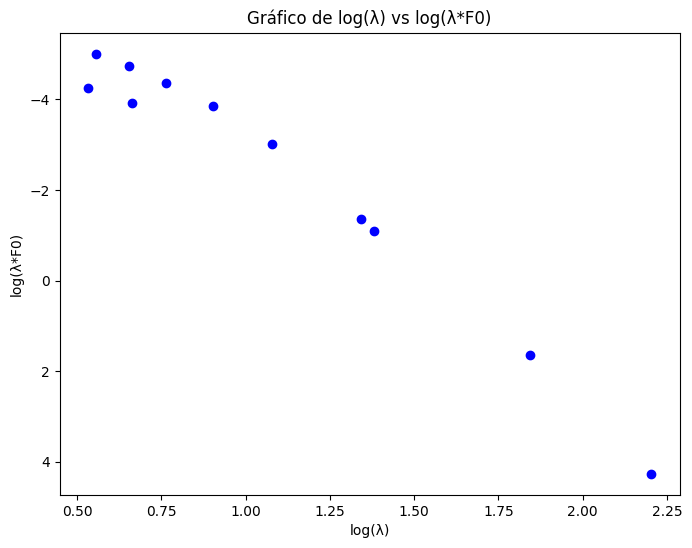

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

table = pd.read_csv(r"D:\GitHub\Tecnicas\MAG_corr.csv")

table['log_lamda'] = np.log10(table['lamda'])
table['F0'] = table['lamda']*10**(-0.4*table['Mag'])*10**(0.4*table['Al/Aj (Rv=3.1)']/3.1)
table['log_(lamda*F0)'] = np.log10(table['lamda']*table['F0'])
print(table)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(table["log_lamda"], table["log_(lamda*F0)"], color="blue", marker="o")

# Invertir el eje y
plt.gca().invert_yaxis()

# Añadir etiquetas y título
plt.xlabel("log(λ)")
plt.ylabel("log(λ*F0)")
plt.title("Gráfico de log(λ) vs log(λ*F0)")

# Mostrar el gráfico
plt.show()